# Lead Score Case Study

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Data:
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value

#### Goal of this case study:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

**</steps> Steps to do in the case study:**
1. Import the necessary libraries
2. Read & Understand the lead score data
3. Data Cleaning 
4. EDA - Univeriate & Bivariate
5. Data preparation for Model
6. Train-Test Split 
7. Feature rescaling
9. Model Building
10. Feature Selection Using RFE
11. Plotting the ROC Curve
12. Making Prediction on the test data
13. Final Observation

## 1. Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Read & Understand the Data

In [2]:
df = pd.read_csv("Leads.csv",header = 0)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# import the Data Directory
data_directory = pd.read_excel(r'Leads Data Dictionary.xlsx', header=2)
data_directory

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


In [4]:
# Checking the dimensions of the Lead score dataframe 

print("In the Lead Score dataset,")
print(f"Number of rows = {df.shape[0]}")
print(f"& Number of Columns = {df.shape[1]}")

In the Lead Score dataset,
Number of rows = 9240
& Number of Columns = 37


In [5]:
# statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# categorical Columns
df.select_dtypes(exclude = ["number"]).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
#numberical cols

df._get_numeric_data().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [8]:
# checking info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

`Note:`
- The `'df'` Lead score dataframe has 37 columns where `7 Numerical` and `30 Categorical` variables are available in it.
- As it can observed from above information, there are few columns having missing/null values in it. We need to check how much data is missing in each column.

- Also, Many of the categorical variables have a level 'Select' which needs to be handled because it is as good as a null value.

## 3. Data Cleaning 
steps:
- Handling the Select level as null values
- Droping the Unique Values (No Duplicates) columns.
- Checking the Missing Values in each columns & Drop the columns having missing values more tha 40%.
- checking the Data imbalance
- Handling the Outliers
- Dropping the unnecessary columns

**3.1 Handling the Select level as null values**

In [9]:
# replacing the "Select" as np.NaN- Null Value in the dataframe
df.replace(to_replace = "Select", value = np.NaN, inplace = True)

**3.2 Dropping the columns with Unique Values/Non-Duplicates**

In [10]:
# columns with Unique Values / Non- duplicate values
def uni_val_cols(df):
    lst = []
    for col in df.columns:
        if len(df[col].unique()) == df.shape[0]:
            lst.append(col)
    return lst

uni_cols = uni_val_cols(df)
uni_cols

['Prospect ID', 'Lead Number']

In [11]:
# dropping above unique values columns
df.drop(uni_cols, axis=1, inplace = True)

**3.3 Checking for Missing Values in the dataframe**

In [12]:
# Checking how much data is missing in each column

missing_data = round(df.isnull().sum()/ df.shape[0]*100,2)
missing_only = missing_data[~(missing_data ==0)]
missing_only.sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [13]:
# Columns having more than 70% Missing Values
def missing_count(df):
    lst = []
    for col in df.columns:
        if (df[col].isnull().sum()/df.shape[0])>0.70:
            lst.append(col)
    return lst

miss_cols = missing_count(df)
miss_cols

['How did you hear about X Education', 'Lead Profile']

In [14]:
# dropping more than 70% missing values columns from the dataframe
df.drop(miss_cols, axis=1, inplace = True)

In [15]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**3.4 Data Imbalance**

**Converted Variable**

In [16]:
# firstly checking data imbalance in our target variable 

df.Converted.value_counts(normalize=1)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

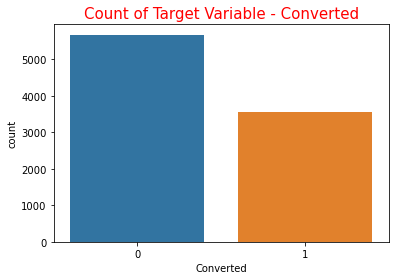

In [17]:
#Visualize the target variable
sns.countplot(df.Converted)
plt.title("Count of Target Variable - Converted", fontsize=15, color="r")
plt.show()

`Note:` Target valiable `Converated` has no data imbalance.

**Lead Origin Variable**

In [18]:
# Checking the Lead Origin

df["Lead Origin"].value_counts(dropna=False, normalize=1)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

**Lead Source Variable**

In [19]:
# Checking the Lead Source

df["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
youtubechannel          1
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
# replacing 'google' as 'Google', 'Facebook' into 'Social Media', NaN & low frequencies as 'Others'

df["Lead Source"] = df["Lead Source"].replace(to_replace = ['google'], value='Google')
df["Lead Source"] = df["Lead Source"].replace(to_replace ='Facebook',value='Social Media')
df["Lead Source"] = df["Lead Source"].replace(to_replace =np.NaN,value='Others')
df["Lead Source"] = df["Lead Source"].replace(to_replace =['bing','Click2call','Live Chat','Press_Release',
                                                           'Pay per Click Ads','welearnblog_Home','blog','NC_EDM',
                                                          'WeLearn','youtubechannel','testone'],value='Others')

In [21]:
df["Lead Source"].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

**Do Not Email Column**

In [22]:
# Checking the Do Not Email column

df["Do Not Email"].value_counts(dropna=False,normalize=1)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

**Do Not Call Column**

In [23]:
# Checking the Do Not Call column

df["Do Not Call"].value_counts(dropna=False,normalize=1)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

`Note:` The valiables `Do Not Call` and `Do Not Email` has data imbalance. In both columns, they have more than 90% of `No` values. We drop these columns from the dataframe.

In [24]:
# Dropping the "Do Not Call" & "Do Not Email" columns from the Dataframe

df.drop(["Do Not Call","Do Not Email"], axis=1, inplace=True)

**TotalVisits**

In [25]:
# Checking the TotalVisits column - Number of Visits by Customers

df["TotalVisits"].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

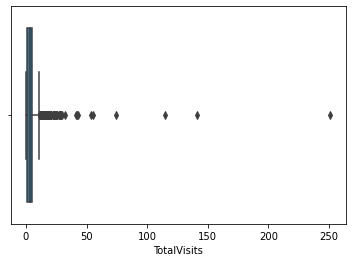

In [26]:
sns.boxplot(df["TotalVisits"])
plt.show()

In [27]:
# replacing the Null Values with Median Value of the column
df["TotalVisits"] = df["TotalVisits"].replace(to_replace = np.NaN, value=df.TotalVisits.median())

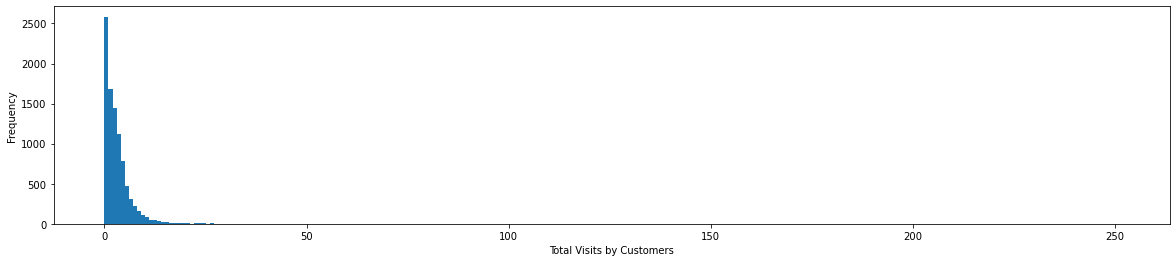

In [28]:
# Plot the total visit to visualize the data
plt.figure(figsize=(20,4))
df.TotalVisits.plot(kind ="hist", bins=250)
plt.xlabel("Total Visits by Customers")
plt.show()

In [29]:
# Converting the TotalVisits into Catogorial dtype (Bins)
Bins = ["0","1-5","6-10","11-15","15+"]
df["TotalVisits_bin"] = pd.cut(df.TotalVisits, bins = (-1,0,5,10,15,999), labels = Bins)

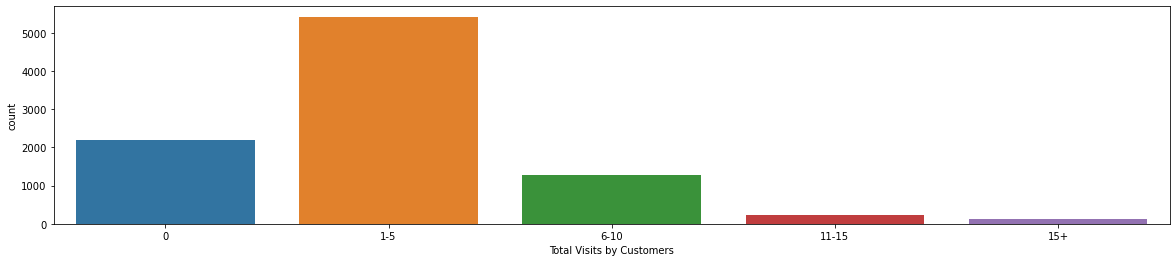

In [30]:
# Visulize the Binned Total Visits by Customers
plt.figure(figsize=(20,4))
sns.countplot(df.TotalVisits_bin)
plt.xlabel("Total Visits by Customers")
plt.show()

In [31]:
df.TotalVisits_bin.describe()

count     9240
unique       5
top        1-5
freq      5421
Name: TotalVisits_bin, dtype: object

**Total Time Spent on Website**

In [32]:
# Checking the Total Time Spent on Website

df["Total Time Spent on Website"].value_counts(dropna=False)

0       2193
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

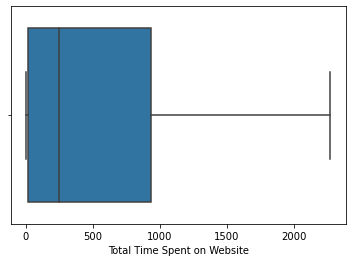

In [33]:
sns.boxplot(df["Total Time Spent on Website"])
plt.show()

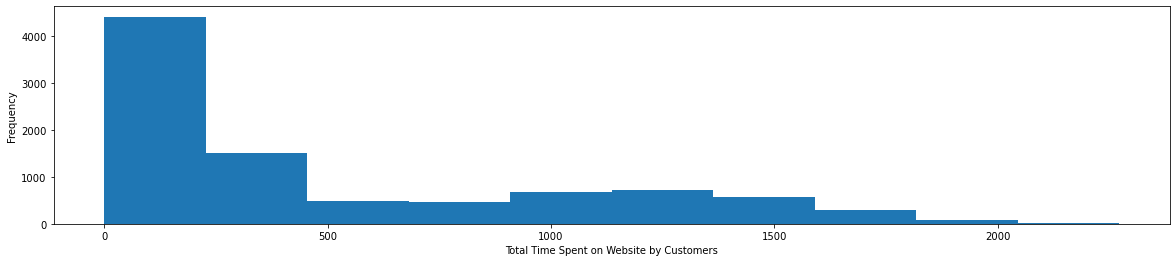

In [34]:
# Plot the total visit to visualize the data
plt.figure(figsize=(20,4))
df["Total Time Spent on Website"].plot(kind ="hist")
plt.xlabel("Total Time Spent on Website by Customers")
plt.show()

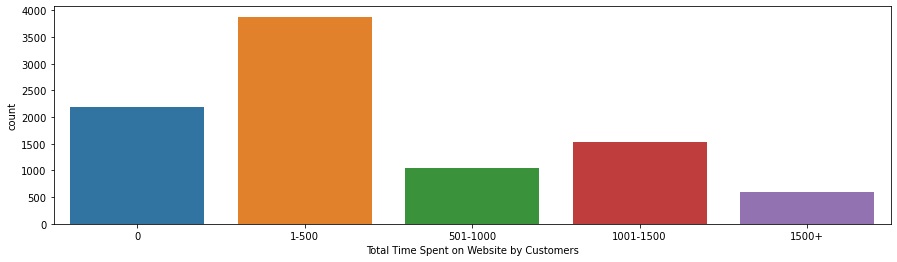

In [35]:
# Converting the Total Time spent on Website into Catogorial dtype (Bins)
Bins = ["0","1-500","501-1000","1001-1500","1500+"]
df["Total Time Spent on Website_bin"] = pd.cut(df["Total Time Spent on Website"], bins = (-1,0,500,1000,1500,9999999), labels = Bins)

# Visulize the Binned Total time spent on website by Customers
plt.figure(figsize=(15,4))
sns.countplot(df["Total Time Spent on Website_bin"])
plt.xlabel("Total Time Spent on Website by Customers")
plt.show()

**Page Views Per Visit**

In [36]:
# Checking the Page Views Per Visit column

df["Page Views Per Visit"].value_counts(dropna= False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

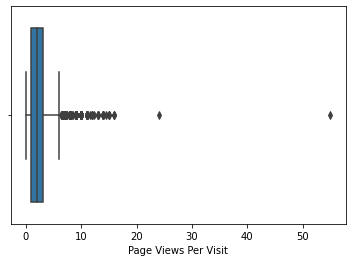

In [37]:
# visualize
sns.boxplot(df["Page Views Per Visit"])
plt.show()

In [38]:
# replacing the Null Values with Median Value of the column
df["Page Views Per Visit"] = df["Page Views Per Visit"].replace(to_replace = np.NaN, value=df.TotalVisits.median())

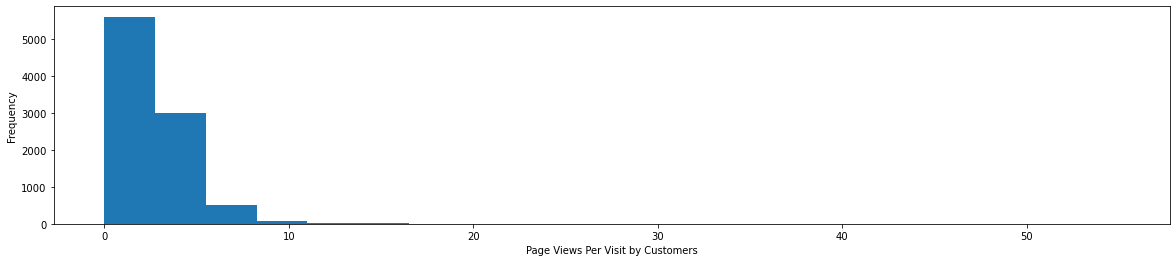

In [39]:
# Plot the page views per visit to visualize the data
plt.figure(figsize=(20,4))
df["Page Views Per Visit"].plot(kind ="hist", bins=20)
plt.xlabel("Page Views Per Visit by Customers")
plt.show()

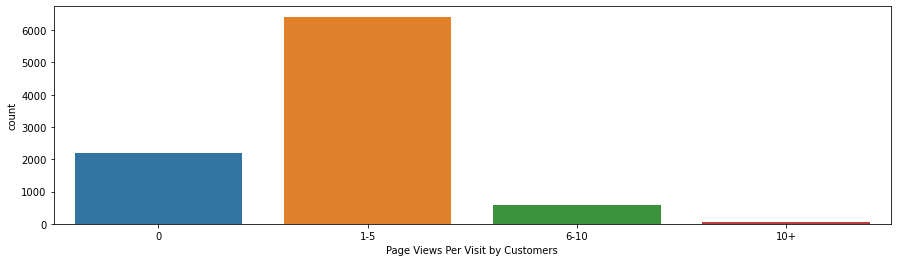

In [40]:
# Converting the page views per visit into Catogorial dtype (Bins)
Bins = ["0","1-5","6-10","10+"]
df["Page Views Per Visit_bin"] = pd.cut(df["Page Views Per Visit"], bins = (-1,0,5,10,9999999), labels = Bins)

# Visulize the page view per visit by Customers
plt.figure(figsize=(15,4))
sns.countplot(df["Page Views Per Visit_bin"])
plt.xlabel("Page Views Per Visit by Customers")
plt.show()

In [41]:
df["Page Views Per Visit_bin"].describe()

count     9240
unique       4
top        1-5
freq      6417
Name: Page Views Per Visit_bin, dtype: object

**Last Activity**

In [42]:
# checking the last acivity performed by Customer
df["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [43]:
# replacing the Null Values with Mode Value "Email Opened" of the column
df["Last Activity"]= df["Last Activity"].replace(np.NaN, "Email Opened")

In [44]:
lst = [ 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront',
 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam']

# replace above list of values into "Others Activity"
df["Last Activity"] = df["Last Activity"].replace(lst,"Other Activities")

**Country Column**

In [45]:
# checking the Country of Customers

df["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
South Africa               4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
Ghana                      2
Belgium                    2
Italy                      2
Uganda                     2
Netherlands                2
China                      2
Sri Lanka                  1
Vietnam                    1
Denmark                    1
Tanzania                   1
Russia                     1
Malaysia      

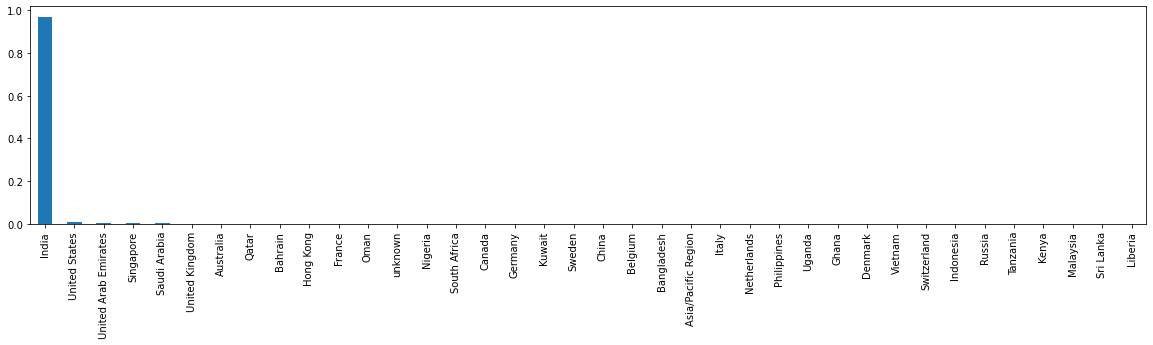

In [46]:
# replace null values into "India"
df["Country"] = df["Country"].replace(np.NaN,"India")

# Visualize
plt.figure(figsize=(20,4))
df["Country"].value_counts(dropna=False, normalize=True).plot.bar()
plt.show()

`Note:`  From the above, it can clearly infer that `97% of data`of Customers belongs to the Country `India` and it won't be any help in our objective. it would be better that we can drop this column.

**Specilization**

In [47]:
# checking the Specialization
df['Specialization'].value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [48]:
Management_list = ['Supply Chain Management', 'IT Projects Management','Finance Management', 'Human Resource Management', 
        'Marketing Management','Operations Management', 'Retail Management', 'Hospitality Management','Healthcare Management']

# replace null values as Not Available value
df["Specialization"] = df["Specialization"].replace(np.NaN,"Not Available")

# replace list of management specializations into one "Management Specialization"
df["Specialization"] = df["Specialization"].replace(Management_list,"Management Specialization")

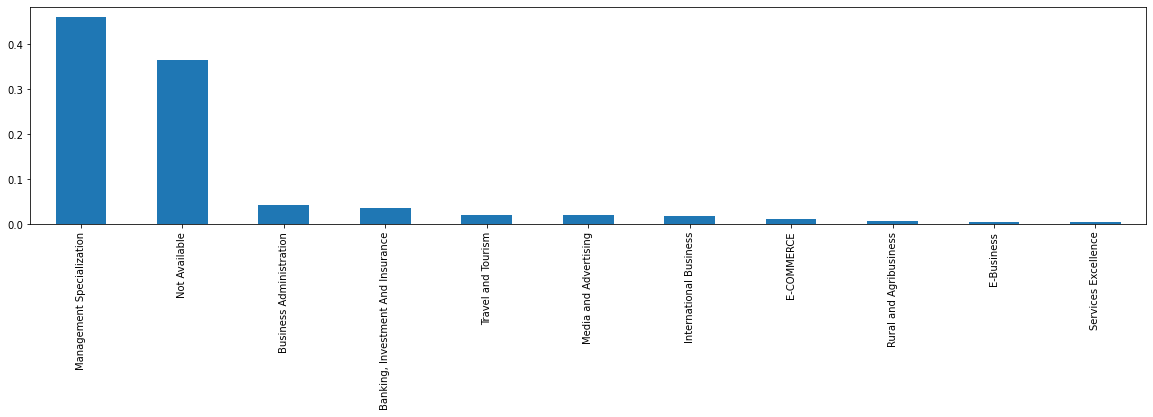

In [49]:
# Visualize
plt.figure(figsize=(20,4))
df["Specialization"].value_counts(dropna=False, normalize=True).plot.bar()
plt.show()

**What is your current occupation**

In [50]:
# checking the Column detail

df["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

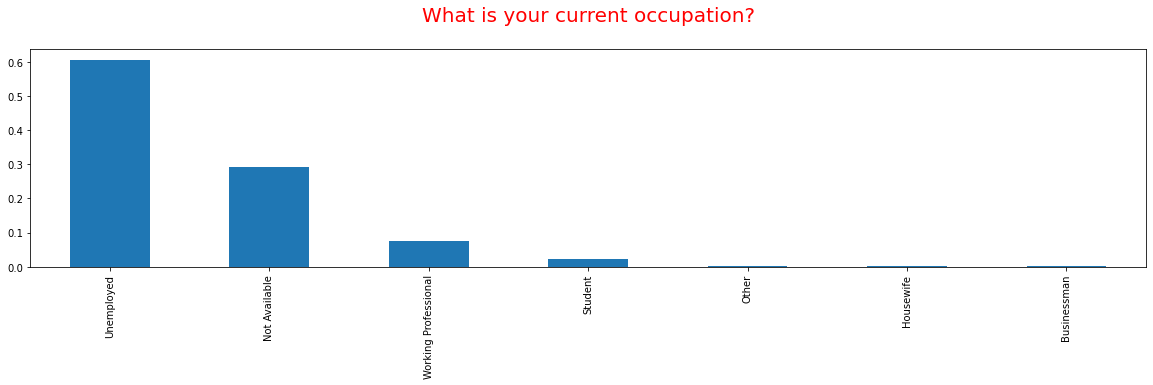

In [51]:
# replace null values as Not Available value
df["What is your current occupation"] = df["What is your current occupation"].replace(np.NaN,"Not Available")

# Visualize
plt.figure(figsize=(20,4))
df["What is your current occupation"].value_counts(dropna=False, normalize=True).plot.bar()
plt.title("What is your current occupation?\n", fontsize=20,color="r")
plt.show()

**What matters most to you in choosing a course**

In [52]:
df['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=1)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

`Note:`  From the above count, after imputing the `Null Value` with `Mode`, we clearly see that `99.9% of data`of Customers go for the `Better Career Prospects` and it won't be any help in our objective. it would be better that we can drop this column from our dataset.

**Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, 
Receive More Updates About Our Courses Features**

In [53]:
df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
   "Receive More Updates About Our Courses"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses
count,9240,9240,9240,9240,9240,9240,9240,9240
unique,2,1,2,2,2,2,2,1
top,No,No,No,No,No,No,No,No
freq,9226,9240,9238,9239,9239,9236,9233,9240


`Note:`  From the above dataframe's statistic, we clearly infer that there is more than `99% of data` belongs to one value i.e. `No`, there's hardly any data for other value `Yes` in above features. So, we drop these columns from our dataset.

**Tags**

In [54]:
# checking the details of columns

df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [55]:
# replace Null values as Not Specified 
df["Tags"] = df["Tags"].replace(np.NaN,"Not Specified")

# Clubbing the Values into one main categories in the column
df["Tags"] = df["Tags"].replace(["Interested  in full time MBA"],"Interested in other courses")

df["Tags"] = df["Tags"].replace(["wrong number given","number not provided","invalid number","Ringing","Busy",
                                 "switched off"],"Not Connected over Telephone")

df["Tags"] = df["Tags"].replace(["Want to take admission but has financial problems","University not recognized",
                                 "Recognition issue (DEC approval)","In confusion whether part time or DLP",
                                "Diploma holder (Not Eligible)","Lost to EINS","Already a student"],"Others tags")

df["Tags"] = df["Tags"].replace(["Shall take in the next coming month","Interested in Next batch", "Lateral student",
                                "Lost to Others","Still Thinking","in touch with EINS","opp hangup","Graduation in progress",
                                "Not doing further education"],"Others tags")

**Lead Quality**

In [56]:
# checking the Lead Quality column

df["Lead Quality"].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [57]:
# imputing the Null Values in to the Not Sure 

df["Lead Quality"] = df["Lead Quality"].replace(np.NaN,"Not Sure")

**Update me on Supply Chain Content & Get updates on DM Content**

In [58]:
# checking the updates on Supply chain content & DM Content column

df[["Update me on Supply Chain Content","Get updates on DM Content"]].describe()

,Update me on Supply Chain Content,Get updates on DM Content
count,9240,9240
unique,1,1
top,No,No
freq,9240,9240


`Note:` From the above dataframe's statistic, we clearly infer that `complete 100% of data` belongs to one category i.e. `No`. So, we drop these columns from our dataset

**A free copy of Mastering The Interview , I agree to pay the amount through cheque**

In [59]:
# checking the above column

df[["A free copy of Mastering The Interview","I agree to pay the amount through cheque"]].describe()

,A free copy of Mastering The Interview,I agree to pay the amount through cheque
count,9240,9240
unique,2,1
top,No,No
freq,6352,9240


In [60]:
df["A free copy of Mastering The Interview"].value_counts(dropna=False, normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

`Note:` 
1. From the above dataframe's statistic, we clearly observe that complete 100% of data belongs to one category i.e. No in the `I agree to pay the amount through cheque` column. So, we drop the columns from our dataset.

2. `A free copy of Mastering The Interview` has a balance data between variables. so we keep it.


**Last Notable Activity**

In [61]:
# checking the values of column
df["Last Notable Activity"].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [62]:
lst = [ 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront',
 'Form Submitted on Website', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam',"Email Bounced"]

# replace above list of values into "Others Activity"
df["Last Notable Activity"] = df["Last Notable Activity"].replace(lst,"Other Activities")

**City**

In [63]:
# checking the values of column
df["City"].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [64]:
# replace Null values as Not Specified 
df["City"] = df["City"].replace(np.NaN,"Not Specified")

**Asymmetrique Profile Score & Asymmetrique Profile Index**

In [65]:
# checking the value counts of the Asymmetrique Profile Score column

df["Asymmetrique Profile Score"].value_counts(dropna=False, normalize=True)

NaN     0.456494
15.0    0.190368
18.0    0.115909
16.0    0.064827
17.0    0.062662
20.0    0.033333
19.0    0.026515
14.0    0.024459
13.0    0.022078
12.0    0.002381
11.0    0.000974
Name: Asymmetrique Profile Score, dtype: float64

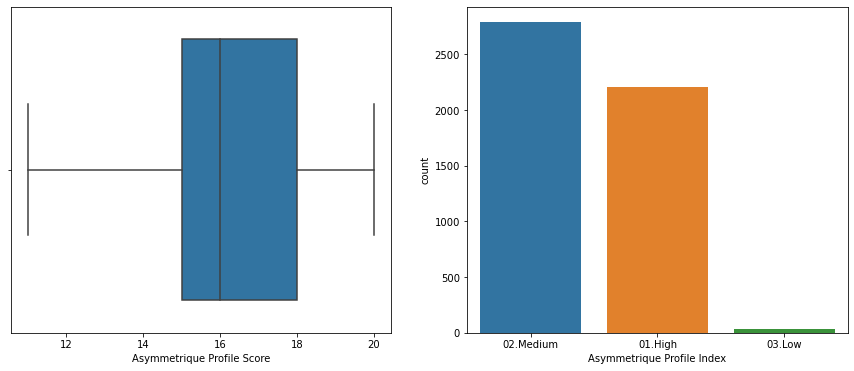

In [66]:
# box plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df["Asymmetrique Profile Score"])

plt.subplot(1,2,2)
sns.countplot(df["Asymmetrique Profile Index"])
plt.show()

In [67]:
# checking the value counts of the Asymmetrique Profile Index column

df["Asymmetrique Profile Index"].value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.301732
01.High      0.238420
03.Low       0.003355
Name: Asymmetrique Profile Index, dtype: float64

`Note:` 
We clearly knows that almost half of data in Asymmetrique Profile Score and Profile Index is missing. Here, we have to decide what approach we would take here to treate the missing values.And we decided to drop both these columns from our dataset to create the model.

However, we decide to do EDA on these columns so that we get any insight out of available data if there is any.

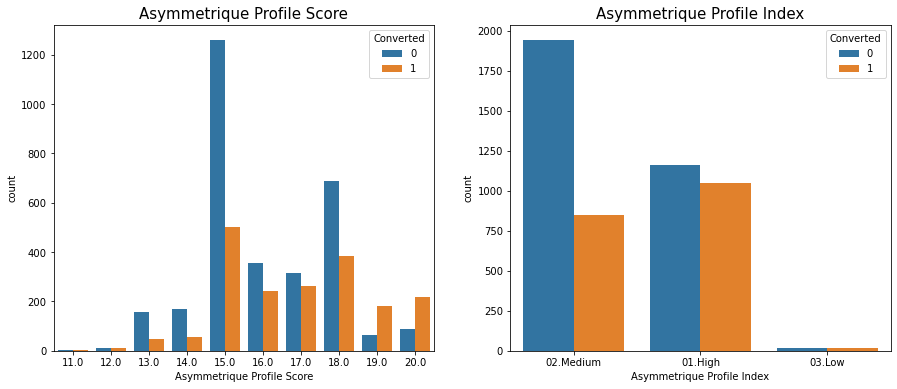

In [68]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(df["Asymmetrique Profile Score"], hue=df["Converted"])
plt.title("Asymmetrique Profile Score", fontsize =15)
print()
plt.subplot(1,2,2)
sns.countplot(df["Asymmetrique Profile Index"], hue = df["Converted"])
plt.title("Asymmetrique Profile Index", fontsize =15)
plt.show()

`Inferences:`
we can infer the following from the above plots of available data of Asymmetrique Profile index and score.
1. About 50% Asymmetrique Profile score ranges from 15.0 to 18.0 and also the conversion rate is also high from rest of other scores. Highest Conversion rate is at the score of 15.0.  
2. It clearly shown in the plot, the conversion rate of customers at `01.High` Asymmetrique Profile Index is more than than that of `02.Medium` and `03.Low`

**Asymmetrique Activity Score & Asymmetrique Activity Index**

In [69]:
# checking the value counts of the Asymmetrique Activity Score column

df["Asymmetrique Activity Score"].value_counts(dropna=False, normalize=True)

NaN     0.456494
14.0    0.191667
15.0    0.139935
13.0    0.083874
16.0    0.050541
17.0    0.037771
12.0    0.021212
11.0    0.010281
10.0    0.006169
9.0     0.000974
18.0    0.000541
8.0     0.000433
7.0     0.000108
Name: Asymmetrique Activity Score, dtype: float64

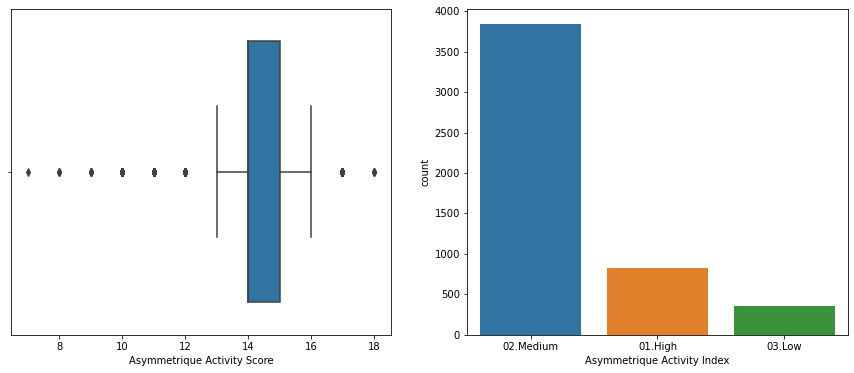

In [70]:
# box plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df["Asymmetrique Activity Score"])

plt.subplot(1,2,2)
sns.countplot(df["Asymmetrique Activity Index"])
plt.show()

In [71]:
# checking the value counts of the Asymmetrique Activity Index column

df["Asymmetrique Activity Index"].value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.415476
01.High      0.088853
03.Low       0.039177
Name: Asymmetrique Activity Index, dtype: float64

`Note:` 
We clearly knows that almost half of data in Asymmetrique Profile Score and Profile Index is missing. Here, we have to decide what approach we would take here to treate the missing values.And we decided to drop both these columns from our dataset to create the model.

However, we decide to do EDA on these columns so that we get any insight out of available data if there is any.

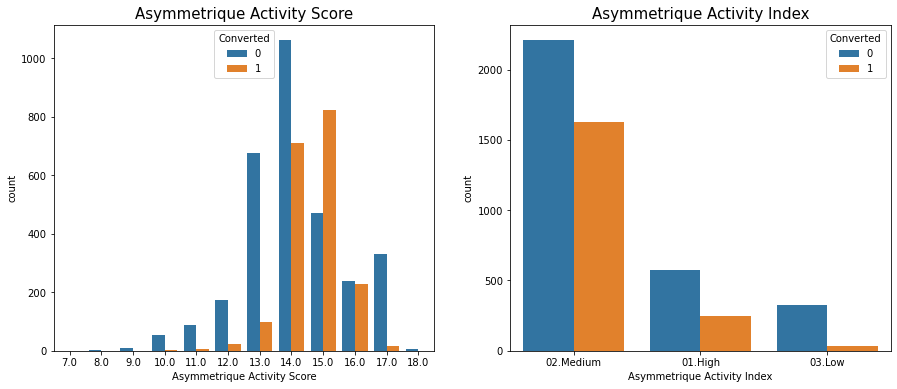

In [72]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.countplot(df["Asymmetrique Activity Score"], hue=df["Converted"])
plt.title("Asymmetrique Activity Score", fontsize =15)
print()
plt.subplot(1,2,2)
sns.countplot(df["Asymmetrique Activity Index"], hue = df["Converted"])
plt.title("Asymmetrique Activity Index", fontsize =15)
plt.show()

`Inferences:`
we can infer the following from the above plots of available data of Asymmetrique Profile index and score.
1. About 95% Asymmetrique Profile score ranges from 13.0 to 16.0 and also the conversion rate is also high from rest of other scores. Highest Conversion rate is at the score of 15.0.  
2. It clearly shown in the plot, the conversion rate of customers at `02.Medium` Asymmetrique Profile Index is more than than that of `01.High` and `03.Low`

#### Handling the Outliers

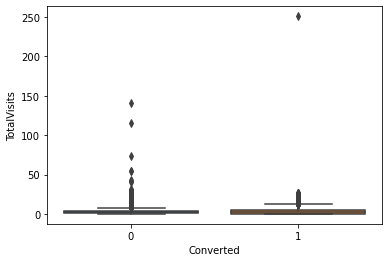

In [73]:
# Total Visits
sns.boxplot(y= "TotalVisits", x="Converted", data=df)
plt.show()

We can infer from above box plots that there are some outliers in the total visits by customers. They could errors or rare occurances as customers visits are so high. So, we decide to drop the values of `TotalVisits` higher than 40.   

In [74]:
# dropping the rows having total visits value more than 40
df = df[~(df["TotalVisits"]>40)]

**Total Time Spent on Website**

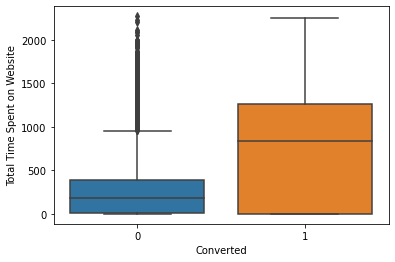

In [75]:
# Visualize
sns.boxplot(y= "Total Time Spent on Website", x="Converted", data=df)
plt.show()

We can infer from above box plots that there are some outliers in the Non-Converted customers box plot. However, they seems continuous array of numbers. so, we decide to do nothing. 

**Page Views Per Visit**

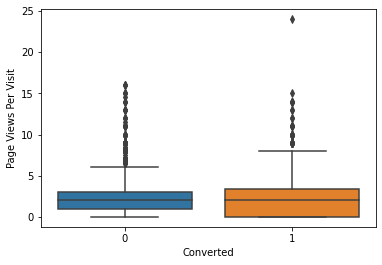

In [76]:
# Visualize
sns.boxplot(y= "Page Views Per Visit", x="Converted", data=df)
plt.show()

We can infer from above box plots that there are some outliers in the Page Views Per Visit. They are very rare occurances as customers visits are so long. So, we decide to drop the values of `Page Views per visits` higher than 20.

In [77]:
# dropping the rows having page views value more than 20
df = df[~(df["Page Views Per Visit"]>20)]

### Dropping the Unnecessary Columns


In [78]:
Cols_to_drop = ['Country','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
                'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
                'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
               'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
                'Asymmetrique Profile Score', 'I agree to pay the amount through cheque']

df.drop(Cols_to_drop, axis=1, inplace=True)

In [79]:
# checking again the dimension of the new datframe

df.shape

(9230, 17)

In [80]:
# again Checking the info of dataframe and dtypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9230 non-null   object  
 1   Lead Source                             9230 non-null   object  
 2   Converted                               9230 non-null   int64   
 3   TotalVisits                             9230 non-null   float64 
 4   Total Time Spent on Website             9230 non-null   int64   
 5   Page Views Per Visit                    9230 non-null   float64 
 6   Last Activity                           9230 non-null   object  
 7   Specialization                          9230 non-null   object  
 8   What is your current occupation         9230 non-null   object  
 9   Tags                                    9230 non-null   object  
 10  Lead Quality                            9230 non

## 4. EDA


In [81]:
# defining the function for Data Analysis.
def EDA_plot(col):
    
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.title(f"Count of {col}\n", fontsize=15, color="r")
    plt.xlabel(col, fontsize=10, loc="center", color="blue")
    plt.ylabel("Count",fontsize=10, loc="center", color="blue")
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.countplot(x=col, hue ="Converted",data=df)
    plt.title(f"{col} vs Conversion Rate\n", fontsize=15, color="r")
    plt.xlabel(col, fontsize=10, loc="center", color="blue")
    plt.ylabel("Count",fontsize=10, loc="center", color="blue")
    plt.xticks(rotation=90)
    
    plt.show()

#### Lead Origin

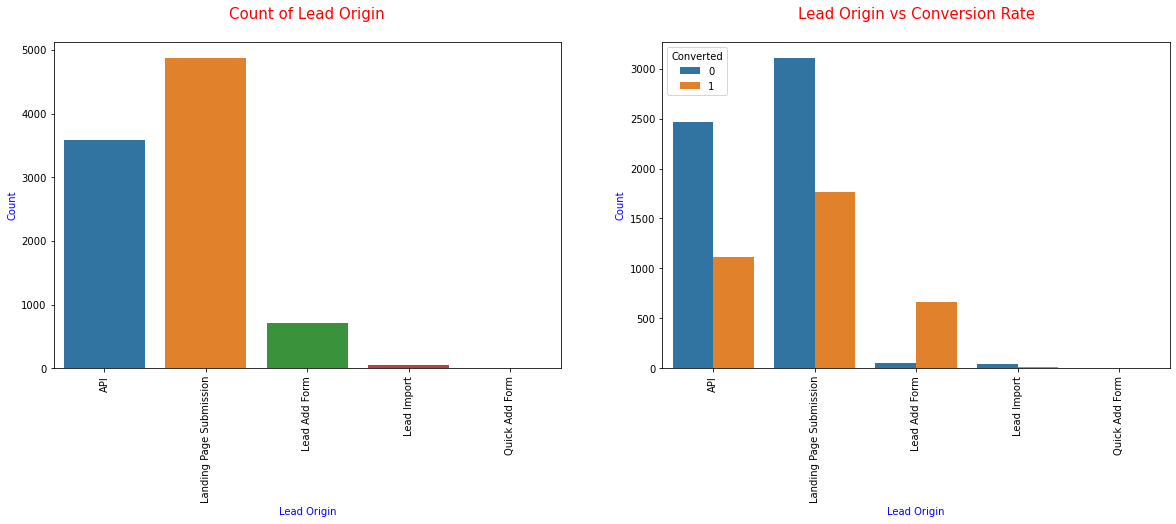

In [82]:
# Visualize the Lead Origin
col = "Lead Origin"
EDA_plot(col)

`INFERENCE:`
1. The Maximum Leads of customers comes by the `Landing Page Submission` origin.

2. Almost 70-80% Leads originate by `Landing Page Submission` and `API`.

3. Clearly infer from above plots that The Conversion rate of `Lead Origin` is higher than other origins. But Maximum customers identifies by `Landing Page Submission` as it originates maximum number of leads.

**Lead Source**

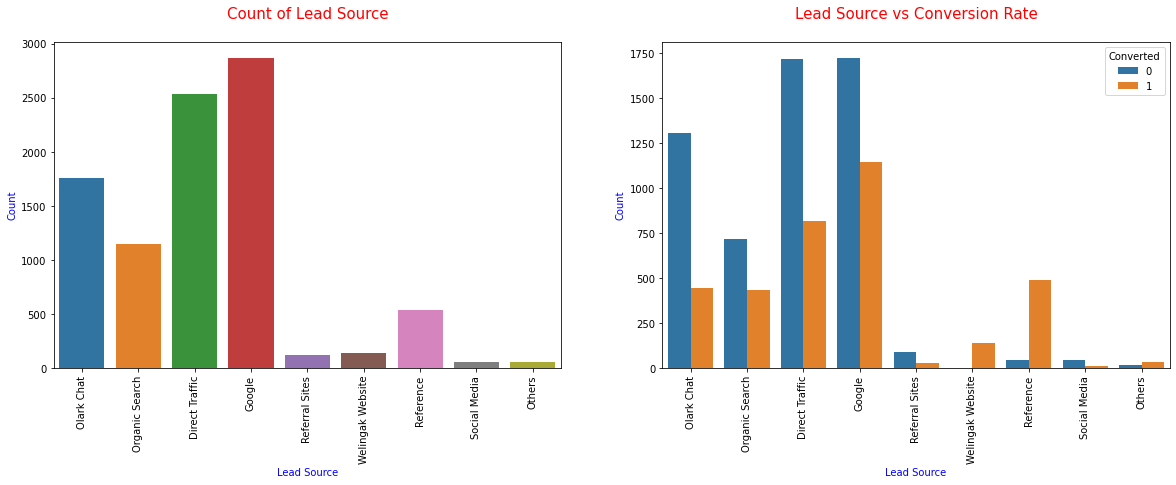

In [83]:
# Visualize the Lead Source and Its Conversion Rate

col = "Lead Source"
EDA_plot(col)

`INFERENCE:`
1. `Google` is the Primary source of leads for X Education.

2. Apart from `Google` source,Almost 50% Leads are from `Direct Traffic` and `Olark Chat`.

3. Clearly infers from above plots that The Conversion rate of `Reference` and `Welingak Website` is better than other origins.But Number of Customer's Conversions are of `Google` and `Direct Traffic` Lead sources. 

**Total Visits**

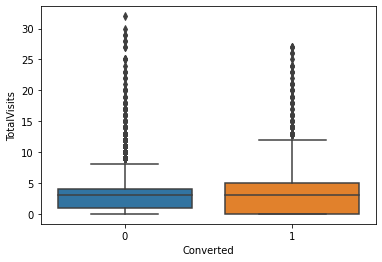

In [84]:
# Visualize
sns.boxplot(y= "TotalVisits", x="Converted", data=df)
plt.show()

**TotalVisits_bin**

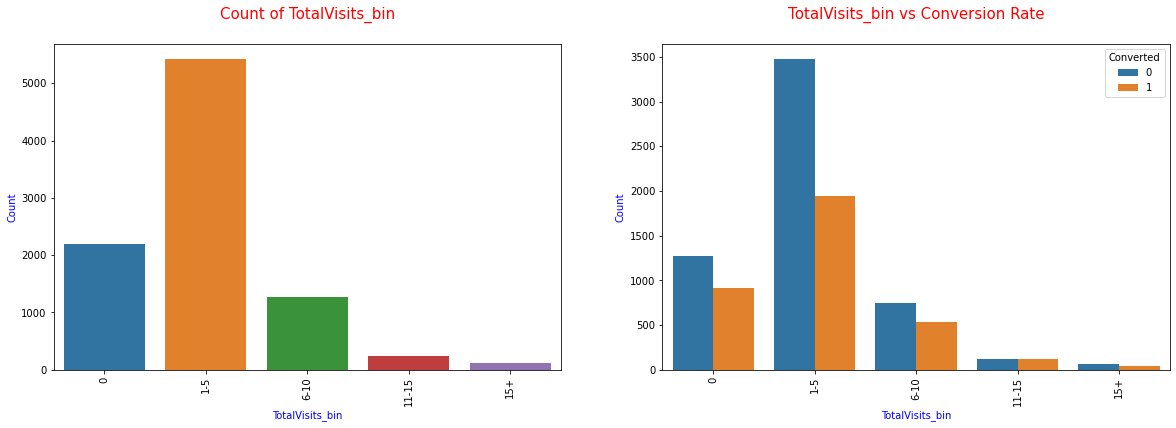

In [85]:
# Visualize the Total Visits and Its Conversion Rate

col = "TotalVisits_bin"
EDA_plot(col)

`INFERENCE:`
1. Generally, The high number of the Customers visit the website by `1-5` only.  

2. As Clearly infer from above plots that The Maximum Conversions of customer likely visits the website only `1-5` times.

3. Around 85-90% of customers visits `1-10` times before making their decision.  

**Total Time Spent on Website**

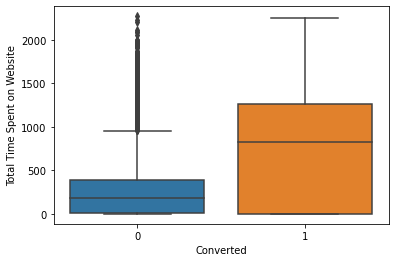

In [86]:
# Visualize
sns.boxplot(y= "Total Time Spent on Website", x="Converted", data=df)
plt.show()

**Total Time Spent on Website_bin**

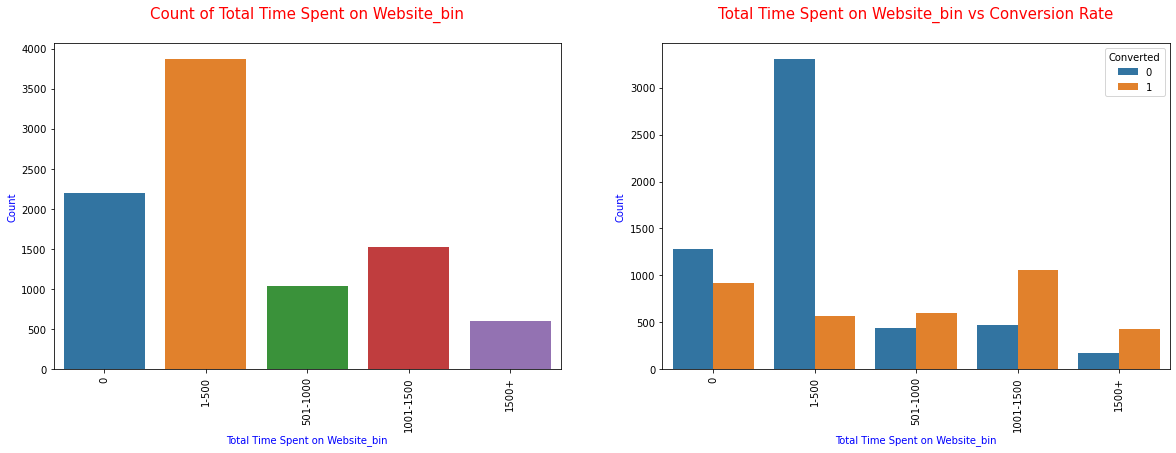

In [87]:
# Visualize the Total Time Spent on Website and Its Conversion Rate

col = "Total Time Spent on Website_bin"
EDA_plot(col)

`INFERENCE:`
1. As clearly infer from box plot that Maximum customers has tendency of spenting the long time on website.
2. The most of customers spent time till `1-500` on the wensite.
3. We can also that the longer the customer spent on time on website, the higher the chances of converting.

**Page Views Per Visit**

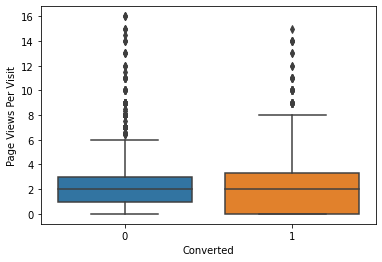

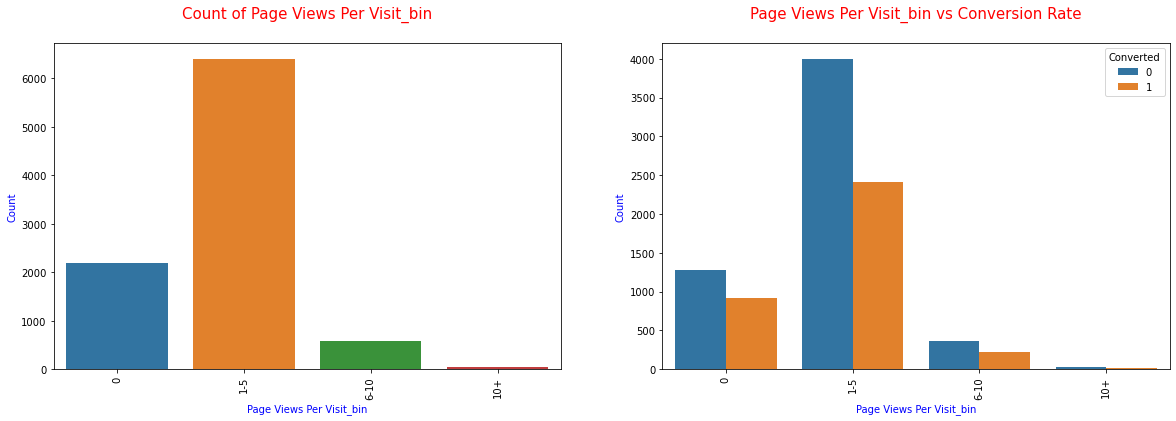

In [88]:
# Visualize
sns.boxplot(y= "Page Views Per Visit", x="Converted", data=df)
plt.show()



# Visualize the Page Views Per Visit binned and Its Conversion Rate

col = "Page Views Per Visit_bin"
EDA_plot(col)

#### Last Activity

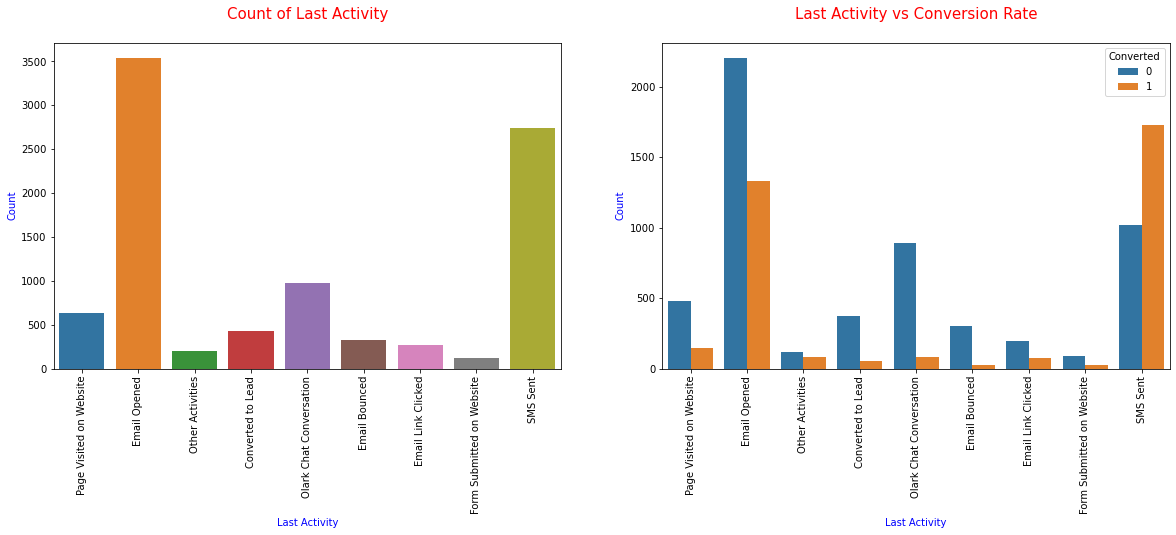

In [89]:
# Visualize the Last Activity By Customer and its conversion rate
col = "Last Activity"
EDA_plot(col)

`INFERENCE:`
1. The most of Customer Leads tends to chaeck their `open their email` before making the decision.

2. As it clearly infer from above plots that The Conversion rate of `SMS Sent` activity is higher than other activities. 

#### What is your current occupation

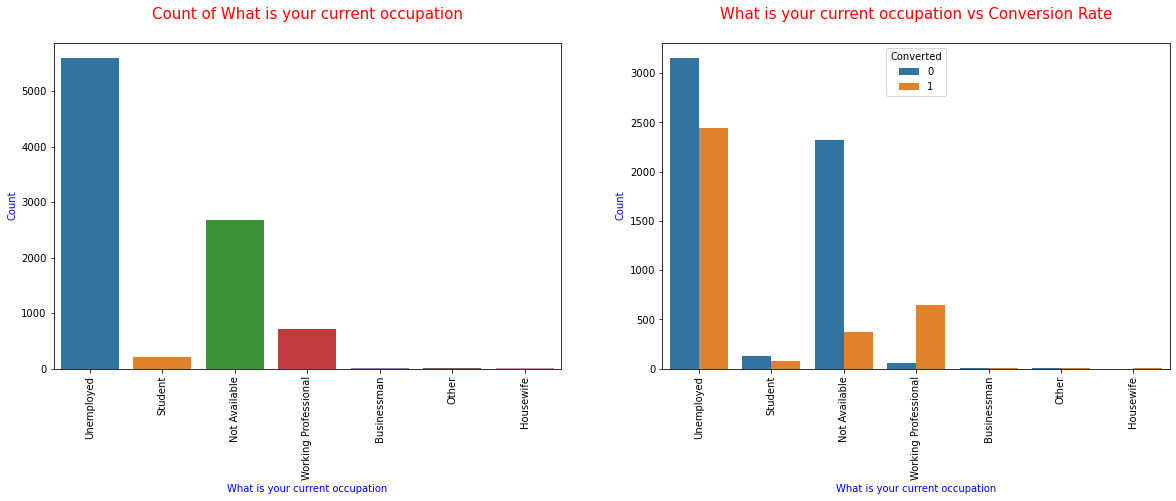

In [90]:
# Visualize the current occupation and its conversion rate
col = "What is your current occupation"
EDA_plot(col)

`INFERENCE:`

1. From above figure, we can infer that most of leads of customers are from the `Unemployed` category .

2. We can also infer from above plots that The `Working Professional` likes the X education's courses better than customer with other occupations and has higher conversion rate.

#### Specialization

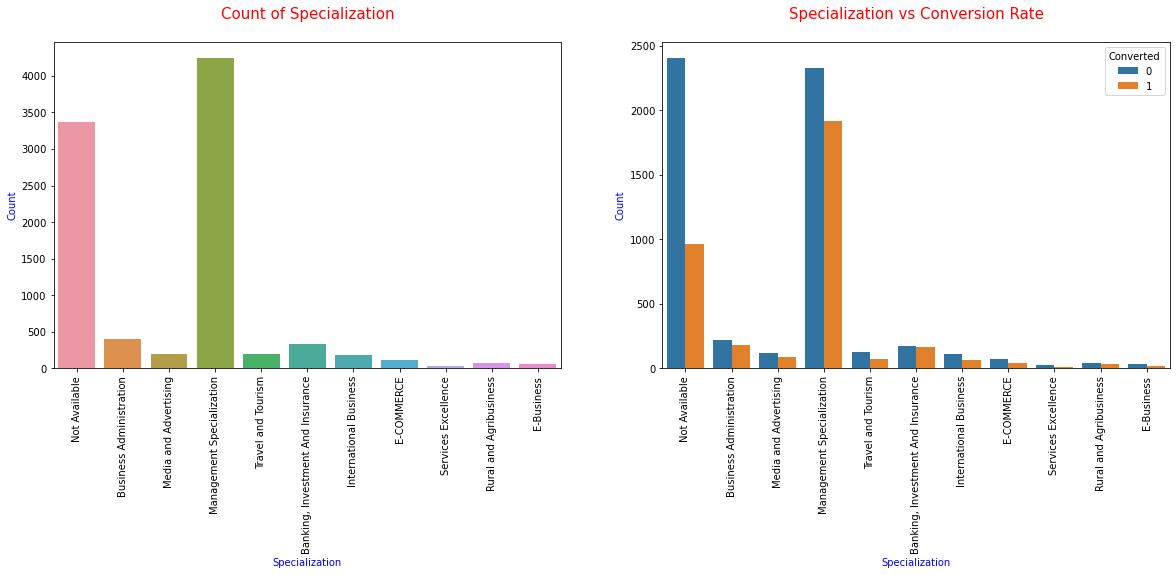

In [91]:
# Visualize the Specialization and its Coversion rate
col = "Specialization"
EDA_plot(col)

`INFERENCE:`

1. From above figure, we can infer that most of leads of customers are  from the `Management Specialization` who shows interest in X Education's courses.

2. We can also infer from above plots that The `Management Specialization` has good conversion rate as well.

3. The Other Specializations such as `Business Administration` and `Banking, Investment and Insurance` also have good conversion rate from other specializations. 

#### Tags

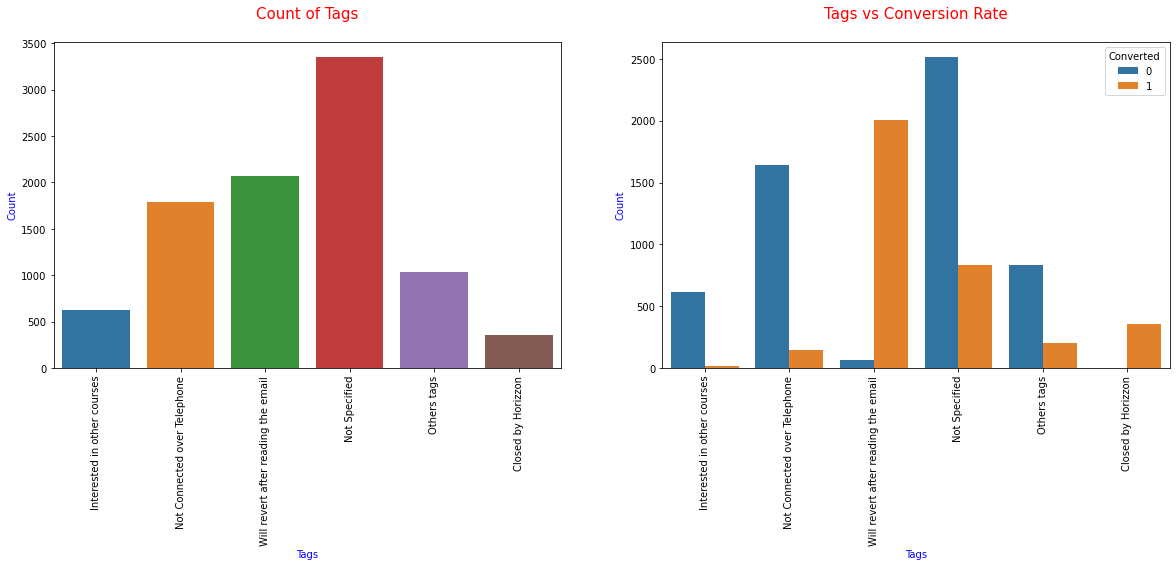

In [92]:
# Visualize the Tags And its Conversion rate
col = "Tags"
EDA_plot(col)

`INFERENCE:`

From the above plots, we can infers that the most of customers tends to `revert after reading email`. So, X education Should more focus on such leads who says that they revert after the reading the email.

#### Lead Quality

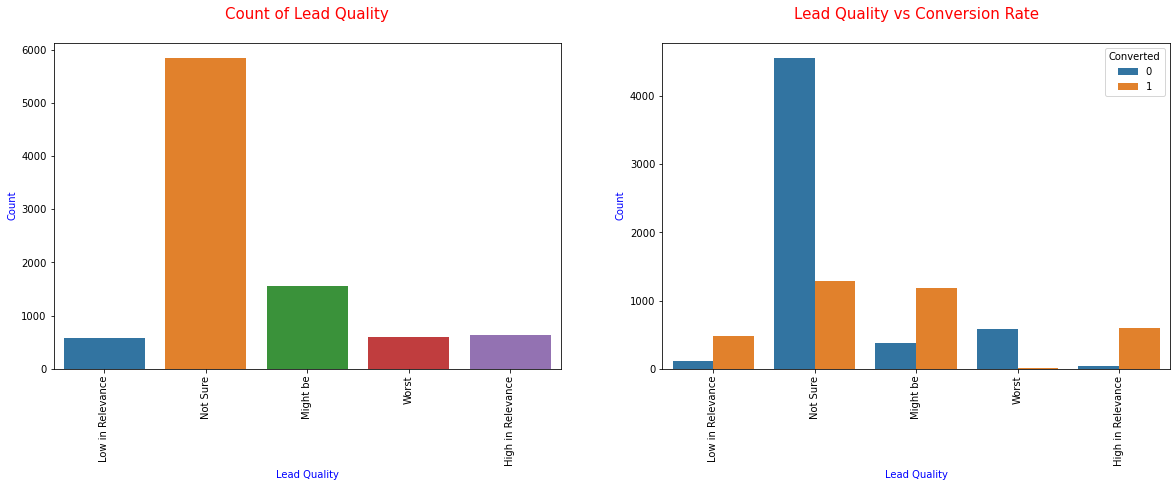

In [93]:
# Visualize the Lead Quality And its Conversion rate
col = "Lead Quality"
EDA_plot(col)

`INFERENCE:`

The most of the customer leads are in `Not Sure` categories. They could be in confused minds to go for the course or not.
Secondly, The `High in Relevance` category's leads have highest conversion rate and the `Worst` has worst lead conversion rate. 

#### City

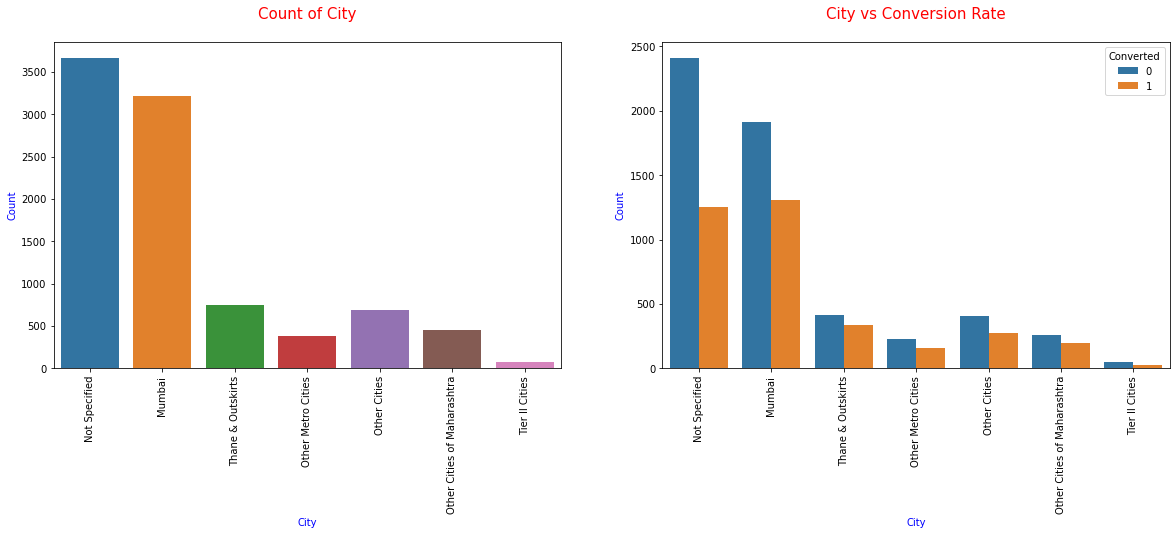

In [94]:
# Visualize the City And its Conversion rate
col = "City"
EDA_plot(col)

`INFERENCE:`

As we can see that the most of customer's leads are from `Mumbai` city and have good lead conversion rate. so, X Education should focus more on the leads of customers who based in Mumbai city. 

**A free copy of Mastering The Interview**

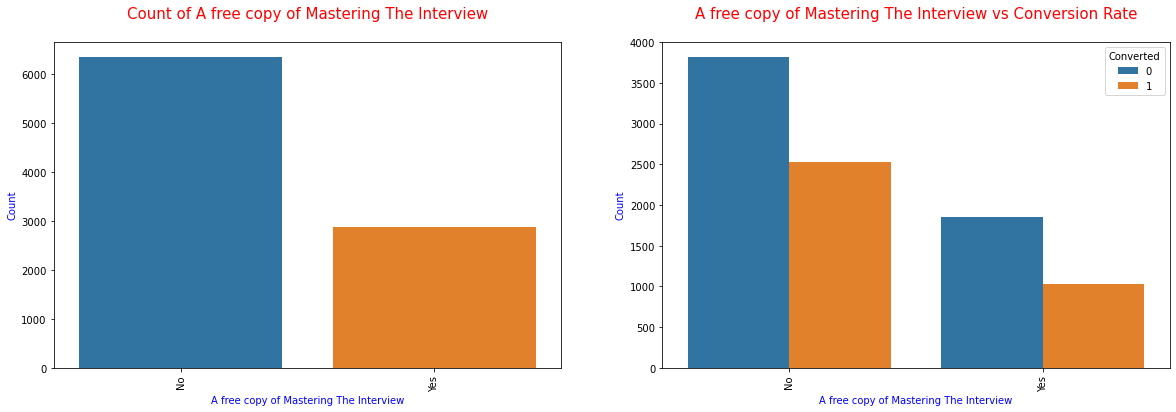

In [95]:
# Visualize the A free copy of Mastering The Interview And its Conversion rate
col = "A free copy of Mastering The Interview"
EDA_plot(col)

#### Last Notable Activity

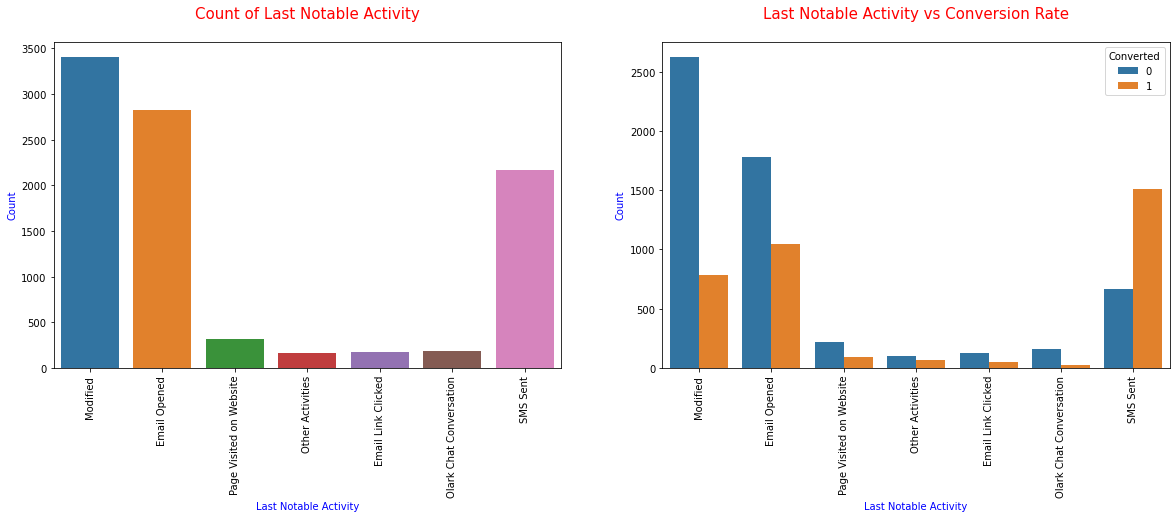

In [96]:
# Visualize the Last Notable Activity And its Conversion rate
col = "Last Notable Activity"
EDA_plot(col)

`INFERENCE:`

The most of leads of Students are from `Modified` category as their `Last Notable Activity`. However, it can clearly observed that highest conversion comes out from the students who's `Last Notable Activity` are recorded as `SMS Sent`.   


In [97]:
# checking the DataFrame
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits_bin,Total Time Spent on Website_bin,Page Views Per Visit_bin
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,Interested in other courses,Low in Relevance,Not Specified,No,Modified,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Available,Unemployed,Not Connected over Telephone,Not Sure,Not Specified,No,Email Opened,1-5,501-1000,1-5
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened,1-5,1500+,1-5
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Activities,Media and Advertising,Unemployed,Not Connected over Telephone,Not Sure,Mumbai,No,Modified,1-5,1-500,1-5
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Available,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified,1-5,1001-1500,1-5


## 5. Data Preparation for Model

#### Converting some binary variables (Yes/No) to 0/1

In [98]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[["A free copy of Mastering The Interview"]] = df[["A free copy of Mastering The Interview"]].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [99]:
# categorical Columns
df.select_dtypes(exclude = ["number"]).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity', 'TotalVisits_bin',
       'Total Time Spent on Website_bin', 'Page Views Per Visit_bin'],
      dtype='object')

In [100]:
# Creating a dummy variable for some of the categorical variables .
# Lead Origin
dummy1 = pd.get_dummies(df[["Lead Origin"]],prefix="Lead_Origin")
dummy1 = dummy1.drop("Lead_Origin_Quick Add Form", axis=1)

# Lead Source
dummy2 = pd.get_dummies(df[["Lead Source"]],prefix="Lead_Source")
dummy2 = dummy2.drop("Lead_Source_Others", axis=1)

# Last Activity
dummy3 = pd.get_dummies(df[["Last Activity"]],prefix="Last_Activity")
dummy3 = dummy3.drop("Last_Activity_Other Activities", axis=1)

# What is your current occupation
dummy4 = pd.get_dummies(df[["What is your current occupation"]],prefix="current_occupation")
dummy4 = dummy4.drop("current_occupation_Other", axis=1)

# Specialization
dummy5 = pd.get_dummies(df[["Specialization"]],prefix="Specialization")
dummy5 = dummy5.drop("Specialization_Not Available", axis=1)

# Tags
dummy6 = pd.get_dummies(df[["Tags"]],prefix="Tags")
dummy6 = dummy6.drop("Tags_Not Specified", axis=1)

# Lead Quality
dummy7 = pd.get_dummies(df[["Lead Quality"]],prefix="Lead_Quality")
dummy7 = dummy7.drop("Lead_Quality_Not Sure", axis=1)

# City
dummy8 = pd.get_dummies(df[["City"]],prefix="City")
dummy8 = dummy8.drop("City_Not Specified", axis=1)

# Last Notable Activity
dummy9 = pd.get_dummies(df[["Last Notable Activity"]],prefix="Notable_Activity")
dummy9 = dummy9.drop("Notable_Activity_Other Activities", axis=1)

In [101]:
# Adding the results to the master dataframe
dummy = pd.concat([dummy1,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7,dummy8,dummy9], axis=1)
dummy.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Numerical variables,

In [102]:
# categorical Columns
df.select_dtypes(include = ["number"]).columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [103]:
# Creating the dataframe of Numerical Variables 
df_num = df[['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview']]
df_num.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0.0,0,0.0,0
1,0,5.0,674,2.5,0
2,1,2.0,1532,2.0,1
3,0,1.0,305,1.0,0
4,1,2.0,1428,1.0,0


In [104]:
# Creating main dataframe to start modelling on it
df_modl = pd.concat([df_num, dummy], axis=1)
df_modl.shape

(9230, 62)

In [105]:
# checking the new complete dataframe
df_modl.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Checking the Correlation between the variables

In [106]:
cor = df_modl.corr()
cor

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
Converted,1.000000,0.044084,0.362918,0.001632,-0.040062,-0.121532,-0.050621,0.321740,-0.023737,-0.080211,...,0.025431,0.009495,0.040100,-0.008820,-0.035628,-0.022060,-0.244768,-0.072752,-0.035282,0.352090
TotalVisits,0.044084,1.000000,0.308360,0.677312,0.274518,-0.268106,0.389637,-0.226022,-0.043183,0.109546,...,0.049993,0.066300,0.090865,0.019290,-0.008406,0.066360,-0.139322,-0.049430,0.223887,0.005950
Total Time Spent on Website,0.362918,0.308360,1.000000,0.331147,0.168900,-0.201553,0.276358,-0.139658,-0.034917,0.133199,...,0.066888,0.051223,0.073707,0.020887,-0.037083,0.010034,-0.107298,-0.051378,0.026857,0.125035
Page Views Per Visit,0.001632,0.677312,0.331147,1.000000,0.282023,-0.363812,0.494817,-0.250730,-0.034093,0.132629,...,0.088232,0.097896,0.091107,0.031627,-0.026558,0.068558,-0.095450,-0.091531,0.022875,0.057845
A free copy of Mastering The Interview,-0.040062,0.274518,0.168900,0.282023,1.000000,-0.476188,0.570098,-0.181006,-0.052208,0.599165,...,0.110064,0.173192,0.047836,0.073043,0.013660,0.058664,-0.084766,-0.057340,0.037663,0.028885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Notable_Activity_Email Opened,-0.022060,0.066360,0.010034,0.068558,0.058664,-0.047666,0.070531,-0.048124,0.012707,0.033459,...,0.034759,0.033900,0.040180,-0.012275,-0.091810,1.000000,-0.507773,-0.094479,-0.124458,-0.368399
Notable_Activity_Modified,-0.244768,-0.139322,-0.107298,-0.095450,-0.084766,0.105112,-0.101493,-0.013244,0.037102,-0.052955,...,-0.034718,-0.051021,-0.023214,0.006821,-0.105643,-0.507773,1.000000,-0.108713,-0.143210,-0.423904
Notable_Activity_Olark Chat Conversation,-0.072752,-0.049430,-0.051378,-0.091531,-0.057340,0.135646,-0.114733,-0.029700,-0.011012,-0.070129,...,-0.025296,-0.013824,-0.030881,-0.012786,-0.019656,-0.094479,-0.108713,1.000000,-0.026646,-0.078874
Notable_Activity_Page Visited on Website,-0.035282,0.223887,0.026857,0.022875,0.037663,-0.029936,0.043905,-0.023126,-0.014506,0.053639,...,-0.012409,-0.011708,0.016661,0.010005,-0.025894,-0.124458,-0.143210,-0.026646,1.000000,-0.103901


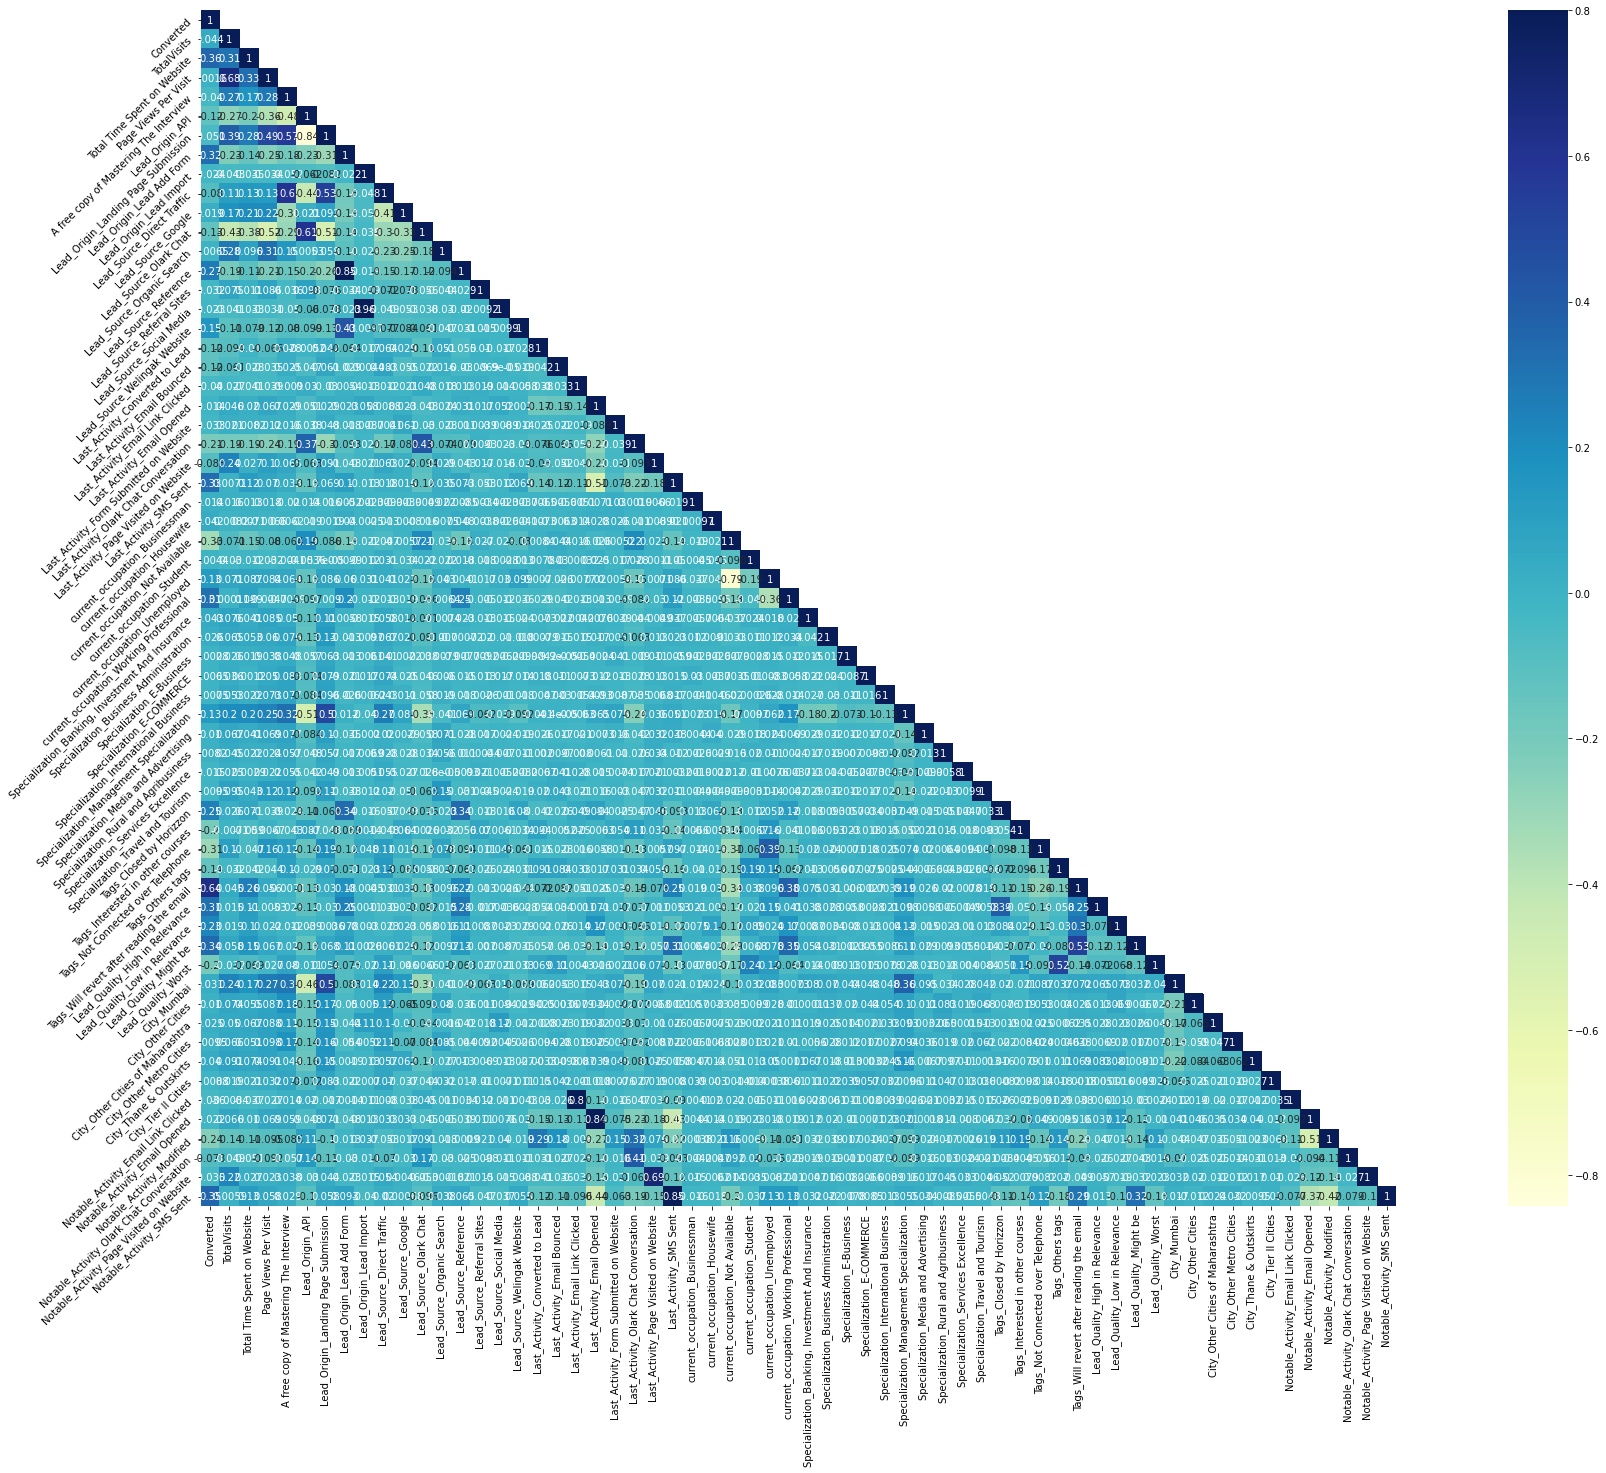

In [107]:
# Visualize the correlations
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(40,22))
sns.heatmap(cor, cmap= "YlGnBu", annot= True, mask=mask, vmax=.8,square=True)
plt.yticks(rotation=45)
plt.show()

## 6. Train-Test Split

In [108]:
# define X and y

X= df_modl.drop("Converted",axis=1)
y= df_modl["Converted"]

In [109]:
y.shape

(9230,)

In [110]:
X.shape

(9230, 61)

**Importing the train_test_split from SKlearn**

In [111]:
# importing
from sklearn.model_selection import train_test_split

In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [113]:
# checking the shape of X_train,X_test,y_train and y_test
print("X_train shape:",X_train.shape,"& X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape,"& y_test shape:",y_test.shape)

X_train shape: (6461, 61) & X_test shape: (2769, 61)
y_train shape: (6461,) & y_test shape: (2769,)


## 7. Feature Scaling

In [114]:
# importing the Standard Scaler from SKlearn
from sklearn.preprocessing import StandardScaler

In [116]:
# 1. instantiate an object
scaler = StandardScaler()

# scale only numerical variable. so, we create a list of numeric vars
num_cols = list(X_train.describe().columns)

#2. fit on data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [117]:
# checking the X_train trasformation after rescaling the features
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
count,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,...,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03,6.461000e+03
mean,-4.126478e-16,3.079275e-17,-2.714986e-18,2.093288e-16,8.047012e-16,2.376472e-16,-3.605433e-16,5.378335e-16,-5.677414e-16,-9.481830e-17,...,1.543933e-17,-7.072624e-16,4.622521e-16,5.572938e-16,1.958914e-16,-6.054075e-16,1.391860e-17,-2.702012e-16,-3.451898e-16,3.221554e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,...,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-9.904163e-01,-8.812275e-01,-1.140726e+00,-6.666667e-01,-8.069466e-01,-1.045452e+00,-2.911846e-01,-7.165047e-02,-6.109173e-01,-6.712721e-01,...,-2.252553e-01,-2.124406e-01,-2.893039e-01,-8.374793e-02,-1.393081e-01,-6.676356e-01,-7.672290e-01,-1.415999e-01,-1.850850e-01,-5.482001e-01
25%,-6.914777e-01,-8.611994e-01,-6.556644e-01,-6.666667e-01,-8.069466e-01,-1.045452e+00,-2.911846e-01,-7.165047e-02,-6.109173e-01,-6.712721e-01,...,-2.252553e-01,-2.124406e-01,-2.893039e-01,-8.374793e-02,-1.393081e-01,-6.676356e-01,-7.672290e-01,-1.415999e-01,-1.850850e-01,-5.482001e-01
50%,-9.360049e-02,-4.369678e-01,-1.706027e-01,-6.666667e-01,-8.069466e-01,9.565238e-01,-2.911846e-01,-7.165047e-02,-6.109173e-01,-6.712721e-01,...,-2.252553e-01,-2.124406e-01,-2.893039e-01,-8.374793e-02,-1.393081e-01,-6.676356e-01,-7.672290e-01,-1.415999e-01,-1.850850e-01,-5.482001e-01
75%,5.042767e-01,8.084161e-01,3.144590e-01,1.500000e+00,1.239239e+00,9.565238e-01,-2.911846e-01,-7.165047e-02,1.636883e+00,1.489709e+00,...,-2.252553e-01,-2.124406e-01,-2.893039e-01,-8.374793e-02,-1.393081e-01,1.497823e+00,1.303392e+00,-1.415999e-01,-1.850850e-01,-5.482001e-01
max,8.575619e+00,3.255486e+00,6.620261e+00,1.500000e+00,1.239239e+00,9.565238e-01,3.434248e+00,1.395664e+01,1.636883e+00,1.489709e+00,...,4.439407e+00,4.707197e+00,3.456573e+00,1.194059e+01,7.178332e+00,1.497823e+00,1.303392e+00,7.062154e+00,5.402924e+00,1.824151e+00


In [118]:
# checking the transformation of X_test dataset after rescaling the features
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,...,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000
mean,0.038110,0.021198,0.016175,0.035211,-0.045077,0.041211,-0.004613,0.039806,0.022266,0.004571,...,0.019012,-0.032996,0.048894,0.042184,-0.007173,-0.015417,-0.011965,0.004088,0.014703,0.032679
std,1.054162,0.992334,0.997791,1.014137,0.989361,0.997495,0.992893,1.245664,1.011295,1.002039,...,1.039302,0.922449,1.073725,1.224309,0.974577,0.993640,0.996896,1.014222,1.037733,1.020296
min,-0.990416,-0.881228,-1.140726,-0.666667,-0.806947,-1.045452,-0.291185,-0.071650,-0.610917,-0.671272,...,-0.225255,-0.212441,-0.289304,-0.083748,-0.139308,-0.667636,-0.767229,-0.141600,-0.185085,-0.548200
25%,-0.691478,-0.855737,-0.655664,-0.666667,-0.806947,-1.045452,-0.291185,-0.071650,-0.610917,-0.671272,...,-0.225255,-0.212441,-0.289304,-0.083748,-0.139308,-0.667636,-0.767229,-0.141600,-0.185085,-0.548200
50%,-0.093600,-0.402374,-0.170603,-0.666667,-0.806947,0.956524,-0.291185,-0.071650,-0.610917,-0.671272,...,-0.225255,-0.212441,-0.289304,-0.083748,-0.139308,-0.667636,-0.767229,-0.141600,-0.185085,-0.548200
75%,0.504277,0.843010,0.498782,1.500000,1.239239,0.956524,-0.291185,-0.071650,1.636883,1.489709,...,-0.225255,-0.212441,-0.289304,-0.083748,-0.139308,1.497823,1.303392,-0.141600,-0.185085,-0.548200
max,7.678803,2.987838,6.620261,1.500000,1.239239,0.956524,3.434248,13.956643,1.636883,1.489709,...,4.439407,4.707197,3.456573,11.940594,7.178332,1.497823,1.303392,7.062154,5.402924,1.824151


## 8. Model Building

**Running First Training Model**

In [119]:
#Importing the necessary lib - statsmodel

import statsmodels.api as sm

In [120]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.2
Date:                Mon, 11 Oct 2021   Deviance:                       2772.5
Time:                        14:57:59   Pearson chi2:                 6.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.7338     19.789     -0.037      0.970     -39.519      38.051
TotalVisits                                          0.1474      0.069      2.130      0.033       0.012       0.283
Total Time Spent on Website                          1.1014      0.057     19.261      0.000       0.989       1.214
Page Views Per Visit                                -0.2177      0.082     -2.652      0.008      -0.379      -0.057
A free copy of Mastering The Interview               0.0459      0.076      0.608      0.543      -0.102       0.194
Lead_Origin_API                                    -10.4250   2.36e+04     -0.000      1.000   -4.62e+04    4.62e+04
Lead_Origin_Landing Page Submission                -10.7238   2.41e+04     -0.000      1.000   -4.72e+04    4.72e+04
Lead_Origin_Lead Add Form                           -5.4894   1.29e+04     -0.000      1.000   -2.54e+04    2.54e+04
Lead_Origin_Lead Import                             -1.5487   3435.635     -0.000      1.000   -6735.269    6732.172
Lead_Source_Direct Traffic                          -0.3022      0.373     -0.811      0.417      -1.033       0.428
Lead_Source_Google                                  -0.1476      0.385     -0.383      0.702      -0.903       0.608
Lead_Source_Olark Chat                               0.1248      0.332      0.376      0.707      -0.525       0.775
Lead_Source_Organic Search                          -0.1844      0.280     -0.658      0.511      -0.734       0.365
Lead_Source_Reference                               -0.2065      0.177     -1.169      0.242      -0.553       0.140
Lead_Source_Referral Sites                          -0.0232      0.108     -0.216      0.829      -0.234       0.188
Lead_Source_Social Media                            -0.0097      0.208     -0.046      0.963      -0.417       0.398
Lead_Source_Welingak Website                         0.3051      0.122      2.506      0.012       0.067       0.544
Last_Activity_Converted to Lead                     -0.0309      0.127     -0.244      0.807      -0.279       0.217
Last_Activity_Email Bounced                         -0.2220      0.104     -2.142      0.032      -0.425      -0.019
Last_Activity_Email Link Clicked                     0.2224      0.118      1.878      0.060      -0.010       0.454
Last_Activity_Email Opened                           0.3605      0.269      1.339      0.180      -0.167       0.888
Last_Activity_Form Submitted on Website              0.0494      0.077      0.642      0.521      -0.102       0.200
Last_Activity_Olark Chat Conversation               -0.1872      0.179     -1.047      0.295      -0.538       0.163
Last_Activity_Page Visited on Website    

## 9. Feature Selection Using RFE

In [121]:
#Import Library

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [122]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [123]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True])

In [124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead_Origin_API', False, 26),
 ('Lead_Origin_Landing Page Submission', False, 29),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 30),
 ('Lead_Source_Direct Traffic', False, 2),
 ('Lead_Source_Google', False, 25),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 17),
 ('Lead_Source_Reference', False, 5),
 ('Lead_Source_Referral Sites', False, 36),
 ('Lead_Source_Social Media', False, 41),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 13),
 ('Last_Activity_Email Bounced', False, 6),
 ('Last_Activity_Email Link Clicked', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Form Submitted on Website', False, 34),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', Fal

In [125]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'current_occupation_Not Available', 'current_occupation_Unemployed',
       'current_occupation_Working Professional', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Not Connected over Telephone',
       'Tags_Will revert after reading the email', 'Lead_Quality_Worst',
       'Notable_Activity_Email Link Clicked', 'Notable_Activity_Email Opened',
       'Notable_Activity_Modified', 'Notable_Activity_SMS Sent'],
      dtype='object')

##### Assessing the model with StatsModels

In [126]:
# Building model-1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.4
Date:                Mon, 11 Oct 2021   Deviance:                       2832.9
Time:                        14:58:08   Pearson chi2:                 6.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7531      0.070    -10.788      0.000      -0.890      -0.616
Total Time Spent on Website                  1.0893      0.055     19.684      0.000       0.981       1.198
Lead_Origin_Lead Add Form                    0.2681      0.076      3.548      0.000       0.120       0.416
Lead_Source_Olark Chat                       0.4094      0.056      7.333      0.000       0.300       0.519
Lead_Source_Welingak Website                 0.3809      0.095      4.027      0.000       0.196       0.566
Last_Activity_Email Link Clicked             0.2726      0.085      3.192      0.001       0.105       0.440
Last_Activity_Email Opened                   0.4652      0.118      3.945      0.000       0.234       0.696
Last_Activity_Olark Chat Conversation       -0.1622      0.077     -2.108      0.035      -0.313      -0.011
Last_Activity_SMS Sent                       0.7348      0.106      6.954      0.000       0.528       0.942
current_occupation_Not Available            -0.6252      0.184     -3.404      0.001      -0.985      -0.265
current_occupation_Unemployed                0.2357      0.190      1.238      0.216      -0.138       0.609
current_occupation_Working Professional      0.2140      0.122      1.752      0.080      -0.025       0.453
Tags_Closed by Horizzon                      0.9561      0.139      6.879      0.000       0.684       1.229
Tags_Interested in other courses            -0.8357      0.090     -9.303      0.000      -1.012      -0.660
Tags_Not Connected over Telephone           -1.3196      0.067    -19.702      0.000      -1.451      -1.188
Tags_Will revert after reading the email     1.3057      0.079     16.451      0.000       1.150       1.461
Lead_Quality_Worst                          -0.8479      0.110     -7.678      0.000      -1.064      -0.631
Notable_Activity_Email Link Clicked         -0.2498      0.089     -2.792      0.005      -0.425      -0.074
Notable_Activity_Email Opened               -0.2976      0.143     -2.078      0.038      -0.578      -0.017
Notable_Activity_Modified                   -0.4395      0.114     -3.845      0.000      -0.664      -0.215
Notable_Activity_SMS Sent                    0.3313      0.130      2.552      0.011       0.077       0.586
============================================================================================================
"""

`Inference:`
The p-Value of vaiable current_occupation_Unemployed is high i.e. `0.216` (more than 0.05). So, we drop it.

In [128]:
# Dropping the vaiable Lead_Quality_High in Relevance
col = col.drop("current_occupation_Unemployed",1)
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'current_occupation_Not Available',
       'current_occupation_Working Professional', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Not Connected over Telephone',
       'Tags_Will revert after reading the email', 'Lead_Quality_Worst',
       'Notable_Activity_Email Link Clicked', 'Notable_Activity_Email Opened',
       'Notable_Activity_Modified', 'Notable_Activity_SMS Sent'],
      dtype='object')

In [129]:
# model-2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.2
Date:                Mon, 11 Oct 2021   Deviance:                       2834.4
Time:                        15:00:36   Pearson chi2:                 6.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7569      0.070    -10.861      0.000      -0.893      -0.620
Total Time Spent on Website                  1.0896      0.055     19.693      0.000       0.981       1.198
Lead_Origin_Lead Add Form                    0.2626      0.076      3.468      0.001       0.114       0.411
Lead_Source_Olark Chat                       0.4101      0.056      7.349      0.000       0.301       0.520
Lead_Source_Welingak Website                 0.3845      0.095      4.064      0.000       0.199       0.570
Last_Activity_Email Link Clicked             0.2749      0.086      3.213      0.001       0.107       0.443
Last_Activity_Email Opened                   0.4721      0.118      4.009      0.000       0.241       0.703
Last_Activity_Olark Chat Conversation       -0.1583      0.077     -2.060      0.039      -0.309      -0.008
Last_Activity_SMS Sent                       0.7438      0.105      7.056      0.000       0.537       0.950
current_occupation_Not Available            -0.8413      0.056    -14.948      0.000      -0.952      -0.731
current_occupation_Working Professional      0.0945      0.076      1.247      0.212      -0.054       0.243
Tags_Closed by Horizzon                      0.9562      0.139      6.877      0.000       0.684       1.229
Tags_Interested in other courses            -0.8361      0.090     -9.303      0.000      -1.012      -0.660
Tags_Not Connected over Telephone           -1.3174      0.067    -19.676      0.000      -1.449      -1.186
Tags_Will revert after reading the email     1.2923      0.078     16.535      0.000       1.139       1.446
Lead_Quality_Worst                          -0.8637      0.110     -7.884      0.000      -1.078      -0.649
Notable_Activity_Email Link Clicked         -0.2533      0.090     -2.827      0.005      -0.429      -0.078
Notable_Activity_Email Opened               -0.3037      0.143     -2.125      0.034      -0.584      -0.024
Notable_Activity_Modified                   -0.4458      0.114     -3.909      0.000      -0.669      -0.222
Notable_Activity_SMS Sent                    0.3250      0.130      2.509      0.012       0.071       0.579
============================================================================================================
"""

`Inference:`
The p-Value of vaiable `current_occupation_Working Professional` is high i.e. `0.212` (more than 0.05). So, we drop it.

In [130]:
# Dropping the vaiable current_occupation_Working Professional
col = col.drop("current_occupation_Working Professional",1)

In [131]:
# model-3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.0
Date:                Mon, 11 Oct 2021   Deviance:                       2836.0
Time:                        15:03:54   Pearson chi2:                 6.65e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7608      0.070    -10.947      0.000      -0.897      -0.625
Total Time Spent on Website                  1.0897      0.055     19.701      0.000       0.981       1.198
Lead_Origin_Lead Add Form                    0.2718      0.075      3.608      0.000       0.124       0.419
Lead_Source_Olark Chat                       0.4088      0.056      7.325      0.000       0.299       0.518
Lead_Source_Welingak Website                 0.3786      0.094      4.006      0.000       0.193       0.564
Last_Activity_Email Link Clicked             0.2738      0.086      3.196      0.001       0.106       0.442
Last_Activity_Email Opened                   0.4755      0.118      4.043      0.000       0.245       0.706
Last_Activity_Olark Chat Conversation       -0.1593      0.077     -2.074      0.038      -0.310      -0.009
Last_Activity_SMS Sent                       0.7469      0.105      7.093      0.000       0.540       0.953
current_occupation_Not Available            -0.8469      0.056    -15.096      0.000      -0.957      -0.737
Tags_Closed by Horizzon                      0.9652      0.139      6.952      0.000       0.693       1.237
Tags_Interested in other courses            -0.8337      0.090     -9.287      0.000      -1.010      -0.658
Tags_Not Connected over Telephone           -1.3219      0.067    -19.764      0.000      -1.453      -1.191
Tags_Will revert after reading the email     1.3169      0.076     17.277      0.000       1.168       1.466
Lead_Quality_Worst                          -0.8647      0.110     -7.891      0.000      -1.079      -0.650
Notable_Activity_Email Link Clicked         -0.2525      0.090     -2.817      0.005      -0.428      -0.077
Notable_Activity_Email Opened               -0.3070      0.143     -2.149      0.032      -0.587      -0.027
Notable_Activity_Modified                   -0.4469      0.114     -3.918      0.000      -0.670      -0.223
Notable_Activity_SMS Sent                    0.3211      0.129      2.481      0.013       0.067       0.575
============================================================================================================
"""

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
# function to calculate the VIFs

def cal_vif(cols_list):
    df1 = X_train[cols_list]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif =vif.sort_values(by="VIF", ascending = False)
    
    return vif

In [136]:
# Create the dataframe of VIFs of all the variables.
cal_vif(col)


,Features,VIF
15,Notable_Activity_Email Opened,7.79
17,Notable_Activity_SMS Sent,7.07
5,Last_Activity_Email Opened,5.06
7,Last_Activity_SMS Sent,4.80
16,Notable_Activity_Modified,4.45
14,Notable_Activity_Email Link Clicked,3.49
4,Last_Activity_Email Link Clicked,3.32
12,Tags_Will revert after reading the email,2.22
8,current_occupation_Not Available,2.18
11,Tags_Not Connected over Telephone,1.93


`Inference:` since there is a correleation between variables and The VIF of variable `Notable_Activity_Email Opened`  is 7.79 greater than 5.00. So, we drop it.

In [137]:
# Dropping the vaiable Notable_Activity_Email Opened
col = col.drop("Notable_Activity_Email Opened",1)

In [138]:
# model-4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.3
Date:                Mon, 11 Oct 2021   Deviance:                       2840.6
Time:                        15:06:33   Pearson chi2:                 6.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7558      0.069    -10.893      0.000      -0.892      -0.620
Total Time Spent on Website                  1.0952      0.055     19.817      0.000       0.987       1.204
Lead_Origin_Lead Add Form                    0.2797      0.075      3.711      0.000       0.132       0.427
Lead_Source_Olark Chat                       0.4151      0.056      7.447      0.000       0.306       0.524
Lead_Source_Welingak Website                 0.3787      0.095      4.005      0.000       0.193       0.564
Last_Activity_Email Link Clicked             0.2510      0.085      2.957      0.003       0.085       0.417
Last_Activity_Email Opened                   0.2997      0.085      3.525      0.000       0.133       0.466
Last_Activity_Olark Chat Conversation       -0.1667      0.077     -2.177      0.030      -0.317      -0.017
Last_Activity_SMS Sent                       0.6857      0.100      6.830      0.000       0.489       0.882
current_occupation_Not Available            -0.8451      0.056    -15.070      0.000      -0.955      -0.735
Tags_Closed by Horizzon                      0.9728      0.139      7.015      0.000       0.701       1.245
Tags_Interested in other courses            -0.8267      0.090     -9.226      0.000      -1.002      -0.651
Tags_Not Connected over Telephone           -1.3237      0.067    -19.801      0.000      -1.455      -1.193
Tags_Will revert after reading the email     1.3081      0.076     17.250      0.000       1.159       1.457
Lead_Quality_Worst                          -0.8683      0.110     -7.911      0.000      -1.083      -0.653
Notable_Activity_Email Link Clicked         -0.1987      0.086     -2.307      0.021      -0.368      -0.030
Notable_Activity_Modified                   -0.2600      0.075     -3.448      0.001      -0.408      -0.112
Notable_Activity_SMS Sent                    0.4857      0.105      4.612      0.000       0.279       0.692
============================================================================================================
"""

In [139]:
# Again Creating the dataframe of VIFs of all the variables.
cal_vif(col)

,Features,VIF
16,Notable_Activity_SMS Sent,5.26
7,Last_Activity_SMS Sent,4.62
14,Notable_Activity_Email Link Clicked,3.30
4,Last_Activity_Email Link Clicked,3.29
5,Last_Activity_Email Opened,2.56
12,Tags_Will revert after reading the email,2.22
8,current_occupation_Not Available,2.18
15,Notable_Activity_Modified,2.16
11,Tags_Not Connected over Telephone,1.93
6,Last_Activity_Olark Chat Conversation,1.73


`Inference:` We observe that the VIF of variable `Notable_Activity_SMS Sent` is high (more than 5.0). So, we drop it.

In [140]:
# Dropping the vaiable Notable_Activity_SMS Sent
col = col.drop("Notable_Activity_SMS Sent",1)

In [141]:
# model-5
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.1
Date:                Mon, 11 Oct 2021   Deviance:                       2862.2
Time:                        15:08:50   Pearson chi2:                 6.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7723      0.069    -11.116      0.000      -0.908      -0.636
Total Time Spent on Website                  1.0948      0.055     19.925      0.000       0.987       1.203
Lead_Origin_Lead Add Form                    0.2809      0.076      3.694      0.000       0.132       0.430
Lead_Source_Olark Chat                       0.4244      0.056      7.642      0.000       0.316       0.533
Lead_Source_Welingak Website                 0.3743      0.094      3.962      0.000       0.189       0.559
Last_Activity_Email Link Clicked             0.2764      0.085      3.252      0.001       0.110       0.443
Last_Activity_Email Opened                   0.1852      0.081      2.280      0.023       0.026       0.344
Last_Activity_Olark Chat Conversation       -0.1616      0.077     -2.102      0.036      -0.312      -0.011
Last_Activity_SMS Sent                       0.9737      0.077     12.577      0.000       0.822       1.125
current_occupation_Not Available            -0.8586      0.056    -15.404      0.000      -0.968      -0.749
Tags_Closed by Horizzon                      1.0012      0.139      7.205      0.000       0.729       1.274
Tags_Interested in other courses            -0.8251      0.090     -9.132      0.000      -1.002      -0.648
Tags_Not Connected over Telephone           -1.2776      0.064    -19.828      0.000      -1.404      -1.151
Tags_Will revert after reading the email     1.3198      0.076     17.321      0.000       1.170       1.469
Lead_Quality_Worst                          -0.8805      0.110     -8.027      0.000      -1.096      -0.666
Notable_Activity_Email Link Clicked         -0.2625      0.085     -3.075      0.002      -0.430      -0.095
Notable_Activity_Modified                   -0.4837      0.059     -8.197      0.000      -0.599      -0.368
============================================================================================================
"""

`Inference:` Since all the p-values are less than 0.05, so now we check if there are any correlation among the variables.

In [142]:
# Again Creating the dataframe of VIFs of all the variables.
cal_vif(col)

,Features,VIF
4,Last_Activity_Email Link Clicked,3.28
14,Notable_Activity_Email Link Clicked,3.26
5,Last_Activity_Email Opened,2.37
7,Last_Activity_SMS Sent,2.31
12,Tags_Will revert after reading the email,2.21
8,current_occupation_Not Available,2.17
11,Tags_Not Connected over Telephone,1.93
6,Last_Activity_Olark Chat Conversation,1.73
1,Lead_Origin_Lead Add Form,1.66
15,Notable_Activity_Modified,1.54


`Inference:` Since all the p-values are less than 0.05 and the VIFs are also less than 5. So, we select Model-5 as our final Model.

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

#Converting into series 
y_train_pred = y_train_pred.values.reshape(-1)

#Creating a dataframe with the actual and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Actual_Converted':y_train.values, 'Prob_Converted':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()


,Actual_Converted,Prob_Converted,Prospect_ID
0,0,0.003199,5537
1,0,0.068483,7059
2,0,0.003368,712
3,0,0.438156,3938
4,0,0.041811,3429


In [144]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Prob_Converted.map(lambda x: 1 if x > 0.5 else 0)

# checking the dataframe
y_train_pred_final.head()

,Actual_Converted,Prob_Converted,Prospect_ID,predicted
0,0,0.003199,5537,0
1,0,0.068483,7059,0
2,0,0.003368,712,0
3,0,0.438156,3938,0
4,0,0.041811,3429,0


### Accurancy (Train Model)

In [145]:
from sklearn import metrics

In [146]:
#Let's check the overall accuracy.
Accuracy1 = metrics.accuracy_score(y_train_pred_final.Actual_Converted, y_train_pred_final.predicted)
Accuracy1

0.9088376412320074

### Confusion Matrix

In [147]:
# Let's check Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.predicted)
print(confusion)

[[3810  191]
 [ 398 2062]]


### Metrics beyond simply accuracy

In [148]:
TP = confusion[1,1] # TP - True Positive 
TN = confusion[0,0] # TN - True Negatives
FP = confusion[0,1] # FP - False Positives
FN = confusion[1,0] # FN - False Negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)

# Let us calculate specificity
specificity = TN / float(TN+FP)

# Calculate false postive rate - predicting converted when customer does not have converted
false_positive_rate = FP/ float(TN+FP)

# positive predictive value 
positive_predictive_value = TP / float(TP+FP)

# Negative predictive value
Negative_predictive_value= (TN / float(TN+ FN))


#Create a dataframe of metric values
Metrics = ["Accuracy", "Sensitivity","Specificity", "False Positive Rate","Positive Predictive Value", "Negative Predictive Value" ]
values = [Accuracy1,sensitivity,specificity,false_positive_rate, positive_predictive_value,Negative_predictive_value]

metric_df = pd.DataFrame({"Metrics":Metrics, "Values":values})

metric_df["%age"] = round(metric_df["Values"]*100,3)

metric_df

,Metrics,Values,%age
0,Accuracy,0.908838,90.884
1,Sensitivity,0.838211,83.821
2,Specificity,0.952262,95.226
3,False Positive Rate,0.047738,4.774
4,Positive Predictive Value,0.915224,91.522
5,Negative Predictive Value,0.905418,90.542


## 10. Plotting the ROC Curve

In [150]:
# define the function for ROC plot

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

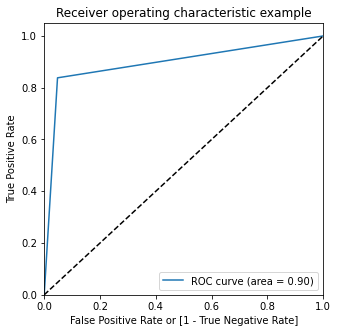

In [151]:
#plotting the ROC curve
draw_roc(y_train_pred_final.Actual_Converted, y_train_pred_final.predicted)

The `ROC Curve` should be close to 1 and we are getting a value of 0.90 which is good value.

Let's find out the optimal value of threshold as we consider an arbitary cut-off value of 0.5 in the above calculation.


**Finding the Optimal value of cut-off**

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob_Converted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Converted,Prob_Converted,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003199,5537,0,1,0,0,0,0,0,0,0,0,0
1,0,0.068483,7059,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003368,712,0,1,0,0,0,0,0,0,0,0,0
3,0,0.438156,3938,0,1,1,1,1,1,0,0,0,0,0
4,0,0.041811,3429,0,1,0,0,0,0,0,0,0,0,0


In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380746  1.000000  0.000000
0.1   0.1  0.813032  0.967073  0.718320
0.2   0.2  0.888098  0.941870  0.855036
0.3   0.3  0.905587  0.911382  0.902024
0.4   0.4  0.913017  0.886992  0.929018
0.5   0.5  0.908838  0.838211  0.952262
0.6   0.6  0.906671  0.816667  0.962009
0.7   0.7  0.902956  0.786992  0.974256
0.8   0.8  0.897384  0.758130  0.983004
0.9   0.9  0.875406  0.686585  0.991502


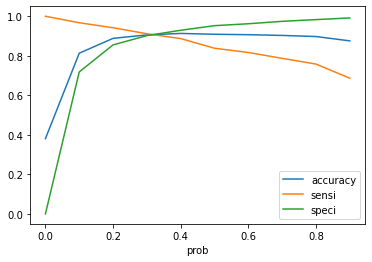

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

from the above figure, we infer that The `optimal cut-off value is 0.35` to take the probility.

In [155]:
# Create final_predicted column for the pred_converted by cutoff of 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob_Converted.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Actual_Converted,Prob_Converted,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003199,5537,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.068483,7059,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003368,712,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.438156,3938,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.041811,3429,0,1,0,0,0,0,0,0,0,0,0,0


### Accuracy - With Optimal Cutoff Point

In [156]:
#Let's check the overall accuracy.
Accuracy = (metrics.accuracy_score(y_train_pred_final.Actual_Converted, y_train_pred_final.final_predicted))

### Confusion Matrix - with optimal cutoff point

In [157]:
# Let's check Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3674  327]
 [ 257 2203]]


### Other Metrics - with optimal cutoff point

In [158]:
TP = confusion[1,1] # TP - True Positive 
TN = confusion[0,0] # TN - True Negatives
FP = confusion[0,1] # FP - False Positives
FN = confusion[1,0] # FN - False Negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)

# Let us calculate specificity
specificity = TN / float(TN+FP)

# Calculate false postive rate - predicting converted when customer does not have converted
false_positive_rate = FP/ float(TN+FP)

# positive predictive value 
positive_predictive_value = TP / float(TP+FP)

# Negative predictive value
Negative_predictive_value= (TN / float(TN+ FN))


In [160]:
#Create a dataframe of metric values
Metrics = ["Accuracy", "Sensitivity","Specificity", "False Positive Rate","Positive Predictive Value", "Negative Predictive Value" ]
values = [Accuracy,sensitivity,specificity,false_positive_rate, positive_predictive_value,Negative_predictive_value]

metric_df = pd.DataFrame({"Metrics":Metrics, "Trains_Values":values})

metric_df["%age"] = round(metric_df["Trains_Values"]*100,3)

metric_df

,Metrics,Trains_Values,%age
0,Accuracy,0.909612,90.961
1,Sensitivity,0.895528,89.553
2,Specificity,0.918270,91.827
3,False Positive Rate,0.081730,8.173
4,Positive Predictive Value,0.870751,87.075
5,Negative Predictive Value,0.934622,93.462


### Precision and Recall

In [161]:
from sklearn.metrics import precision_score, recall_score

In [162]:
# Let's check Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.predicted)
print(confusion)

[[3810  191]
 [ 398 2062]]


**Precision = TP/(TP+FP) & Recall = TP/(TP+FN)**

In [163]:
TP = confusion[1,1] # TP - True Positive 
TN = confusion[0,0] # TN - True Negatives
FP = confusion[0,1] # FP - False Positives
FN = confusion[1,0] # FN - False Negatives

# lets calculate precision
precision = TP / float(TP + FP)

# lets calculate recall value
recall = TP / float(TP + FN)

#Create a dataframe of values
Metrics1 = ["Accuracy", "Precision","Recall" ]
values1 = [Accuracy1,precision,recall]

df_metric = pd.DataFrame({"Metrics":Metrics1, "Values":values1})

df_metric["%age"] = round(df_metric["Values"]*100,3)

df_metric

,Metrics,Values,%age
0,Accuracy,0.908838,90.884
1,Precision,0.915224,91.522
2,Recall,0.838211,83.821


## 11. Making predictions on the test set

In [164]:
X_test = X_test[col]

X_test_sm = sm.add_constant(X_test)

In [165]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect_ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1 into y_pred_final
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Lets See the DataFrame "y_pred_final"
y_pred_final.head()

,Converted,Prospect_ID,0
0,0,6410,0.138534
1,1,6435,0.998982
2,0,1520,0.000162
3,0,6588,0.032600
4,0,6889,0.017436


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Pred_Converted'})

# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Prospect_ID','Converted','Pred_Converted'], axis=1)

# Let's see y_pred_final
y_pred_final.head()

,Converted,Prospect_ID,Pred_Converted
0,0,6410,0.138534
1,1,6435,0.998982
2,0,1520,0.000162
3,0,6588,0.032600
4,0,6889,0.017436


In [167]:
y_pred_final['Pred_final_Converted'] = y_pred_final.Pred_Converted.map( lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Converted,Prospect_ID,Pred_Converted,Pred_final_Converted
0,0,6410,0.138534,0
1,1,6435,0.998982,1
2,0,1520,0.000162,0
3,0,6588,0.032600,0
4,0,6889,0.017436,0


In [168]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Pred_final_Converted)
print(confusion)

[[1525  145]
 [ 108  991]]


In [169]:
#Let's check the accuracy.
accuracy = (metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Pred_final_Converted))

In [170]:
TP = confusion[1,1] # TP - True Positive 
TN = confusion[0,0] # TN - True Negatives
FP = confusion[0,1] # FP - False Positives
FN = confusion[1,0] # FN - False Negatives

# Let's see the sensitivity of our logistic regression model
sens = TP / float(TP+FN)

# Let us calculate specificity
spec = TN / float(TN+FP)

# Calculate false postive rate - predicting converted when customer does not have converted
false_pos_rate = FP/ float(TN+FP)

# positive predictive value 
pos_pred_value = TP / float(TP+FP)

# Negative predictive value
Neg_pred_value= (TN / float(TN+ FN))


#Create a dataframe of metric values
Metrics = ["Accuracy", "Sensitivity","Specificity", "False Positive Rate","Positive Predictive Value", 
           "Negative Predictive Value"]
values = [accuracy,sens,spec,false_pos_rate, pos_pred_value,Neg_pred_value]

test_metric_df = pd.DataFrame({"T_Metrics":Metrics, "TestSet_Values":values})

test_metric_df["%age_test"] = round(test_metric_df["TestSet_Values"]*100,3)

test_metric_df

,T_Metrics,TestSet_Values,%age_test
0,Accuracy,0.908631,90.863
1,Sensitivity,0.901729,90.173
2,Specificity,0.913174,91.317
3,False Positive Rate,0.086826,8.683
4,Positive Predictive Value,0.872359,87.236
5,Negative Predictive Value,0.933864,93.386


## 12. Final Obervations of the Model Built

In [171]:
#create dataframe of matric values for both train dataset and test dataset to compare the result
train_test_matric = pd.concat([metric_df,test_metric_df], axis=1)
train_test_matric.drop("T_Metrics", axis=1, inplace=True)
train_test_matric

,Metrics,Trains_Values,%age,TestSet_Values,%age_test
0,Accuracy,0.909612,90.961,0.908631,90.863
1,Sensitivity,0.895528,89.553,0.901729,90.173
2,Specificity,0.918270,91.827,0.913174,91.317
3,False Positive Rate,0.081730,8.173,0.086826,8.683
4,Positive Predictive Value,0.870751,87.075,0.872359,87.236
5,Negative Predictive Value,0.934622,93.462,0.933864,93.386


### Final Observation:
From the above Metric dataframe, we knows about the following

**From Train model,** 
- Accuracy = 90.96%
- Sensitivity = 89.55%
- Specificity = 91.83%

**From Test model,** 
- Accuracy = 90.86%
- Sensitivity = 90.17%
- Specificity = 91.32%

##### With an Accuracy of 90.9% of Model,  The Management of X Education can workout on their soft leads to convert them hot leads and then convert them to customers.

**List of Top 5 Dummy Varibales of Model:**
1. Tags_Will revert after reading the email (Co-efficient Value of 1.3198)
2. Total Time Spent on Website (Co-efficient Value of 1.0948)
3. Tags_Closed by Horizzon (Co-efficient Value of 1.0012)
4. Last_Activity_SMS Sent (Co-efficient Value of 0.9737)
5. Lead_Source_Olark Chat (Co-efficient Value of 0.4244)

**- - - - - - - - - - Case Study End - - - - - - - - -**